In [1]:
## Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats
import re

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)

In [2]:
## Load the Datasets

ap = pd.read_csv("application_data.csv")
py=pd.read_csv("previous_application.csv")

In [3]:
## Checking the Applicattion Dataset

ap.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
## Checking the Previous Application Dataset

py.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Working on the Application Dataset First

In [5]:
### Check the structure of the dataset to check the data types, columns and null values

ap.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
## Checking the shape of the dataset

ap.shape

(307511, 122)

From the info and shape functions, we found out-

1. The dataset has 307511 rows and 122 columns.
2. There are 65 columns with dtype as Float, 41 as Int and 16 as Object.
3. There are some columns which has null values present

Dealing with the missing values on the application dataset



In [7]:
### Finding the columns with the missing value count and Percentage by creating a dataframe

null_count = ap.isnull().sum()
null_percentage = round((ap.isnull().sum()/ap.shape[0])*100, 2)

null_ap = pd.DataFrame({'column_name' : ap.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_ap.reset_index(drop = True, inplace = True)

null_ap.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
84,NONLIVINGAPARTMENTS_MEDI,213514,69.43
86,FONDKAPREMONT_MODE,210295,68.39
68,LIVINGAPARTMENTS_MODE,210199,68.35
54,LIVINGAPARTMENTS_AVG,210199,68.35
82,LIVINGAPARTMENTS_MEDI,210199,68.35


Remomving Columns with Null Value > 40%. Steps to be taken-

1. Find the columns with more than 40% Null Value.
2. Drop them from the dataset

In [8]:
### Finding the Columns thats has more than 40% null values

ap_del=null_ap[null_ap['null_percentage'] > 40].column_name.to_list()

len(ap_del)

49

In [9]:
## Remomving 49 Columns from the dataset

ap.drop(columns = ap_del, inplace = True)

In [10]:
### Checking the shape of the dataset after remoivng the columns

ap.shape

(307511, 73)

Checking the columns with Null Value < 40%. Steps to be taken-

1. Find the columns with less than 40% Null Value.
2. Find a Proper way to replace the missing values, if possible

In [11]:
##### Creating a dataframe to store columns with less then 40% Null Values

null_ap_under40 = null_ap[null_ap['null_percentage'] < 40]

null_ap_under40.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
116,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
11,NAME_TYPE_SUITE,1292,0.42
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33


The Column OCCUPATION_TYPE has the highest null value(31%). We need to check this column first before proceeding to other columns which has null value

In [12]:
### Checking the OCCUPATION_TYPE Column

ap['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Thought Process:-

1. Laborers has the highest values followed by Sales Staff and Core Staff. 
2. We can replace the null values with Mode which will replace all the null values with Laborers.

In [13]:
# Replace the null value in OCCUPATION_TYPE with "Laborers"
ap.OCCUPATION_TYPE.describe()

ap.OCCUPATION_TYPE.mode()

ap["OCCUPATION_TYPE"].fillna("Laborers", inplace = True)

In [14]:
# Check if that column still has null value
ap["OCCUPATION_TYPE"].isnull().sum()

0

In [15]:
ap['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [16]:
### Checking remaining values with null values

ap.isnull().sum().sort_values(ascending=False)/len(ap)*100

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

Analysing the Column "EXT_SOURCE_3" which has the highest Null Value now.

In [17]:
### Checking the EXT_SOURCE_3 Column

ap['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [18]:
### Checkiong the Statistical data for EXT_SOURCE_3

ap['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

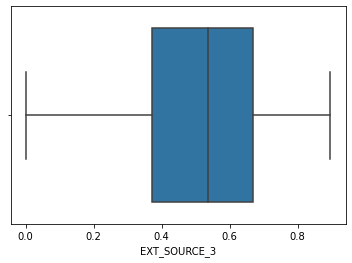

In [19]:
### Plotting a Box Plot as well

sns.boxplot(ap.EXT_SOURCE_3)
plt.show()

In [20]:
### Calculating Mode
ap['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [21]:
### Calculating Mean
ap['EXT_SOURCE_3'].mean()

0.5108529061799658

In [22]:
### Calculating Median
ap['EXT_SOURCE_3'].median()

0.5352762504724826

Observations:

1. The Median Value is 0.54, Mode is 0.74 and Mean is 0.51.
2. We can impute the missing values with wither mean or median but as the number of missing values are high, it would be better to leave this as missing values as of now.
3. Also, the column description of this column  says "Normalized score from external data source" which is not very clear. Therefore taking a call of not doing anything with this column.



The below Columns has the same number of null values (`13%). The description of these below columns are quite similar and therefore will analyse these columns together and do the same imputation to all the columns if possible.

AMT_REQ_CREDIT_BUREAU_YEAR   
AMT_REQ_CREDIT_BUREAU_QRT     
AMT_REQ_CREDIT_BUREAU_MON       
AMT_REQ_CREDIT_BUREAU_WEEK     
AMT_REQ_CREDIT_BUREAU_DAY     
AMT_REQ_CREDIT_BUREAU_HOUR 

In [23]:
### Checkiong the statistical summary for these columns 

ap[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


Thought Process:-

1. These columns means enquiries made to the credit bureau about the client hour, day, week, etc. before the application.
2. Now any client who wishes to apply for loan, the bank will make an enquiry to the credit bureau to check the credit score and form their the bank will get to know if the client has credit score or not and if yes, what is the score.
3. Checking Median and Mode of these columns to see if the missing values can be imputed or not. 


In [24]:
# Checking the Mode 


ap[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Checking the Median

ap[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

As for all the columns, mode is 0 and for almost all the columns, the median is also 0, taking a call to replace the missing values for these columns with mode, i.e   0

In [26]:
# Replace the null value in AMT_REQ_CREDIT_BUREAU_YEAR with mode, i.e 0
ap["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0, inplace = True)


In [27]:
# Check if that column still has null value
ap["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

In [28]:
# Replace the null value in AMT_REQ_CREDIT_BUREAU_QRT with mode, i.e 0
ap["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0, inplace = True)

In [29]:
# Check if that column still has null value
ap["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

0

In [30]:
# Replace the null value in AMT_REQ_CREDIT_BUREAU_MON with mode, i.e 0
ap["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0, inplace = True)

In [31]:
# Check if that column still has null value
ap["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

0

In [32]:
# Replace the null value in AMT_REQ_CREDIT_BUREAU_DAY with mode, i.e 0
ap["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0, inplace = True)

In [33]:
# Check if that column still has null value
ap["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

0

In [34]:
# Replace the null value in AMT_REQ_CREDIT_BUREAU_HOUR with mode, i.e 0
ap["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0, inplace = True)

In [35]:
# Check if that column still has null value
ap["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

0

In [36]:
# List of remaining columns which have null values
ap.isnull().sum().sort_values(ascending=False) / len(ap)*100


EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_11                0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_13

## Checking columns with NULL values > 0% and < 1%

NAME_TYPE_SUITE                
OBS_30_CNT_SOCIAL_CIRCLE       
DEF_30_CNT_SOCIAL_CIRCLE        
OBS_60_CNT_SOCIAL_CIRCLE        
DEF_60_CNT_SOCIAL_CIRCLE       
EXT_SOURCE_2                   
AMT_GOODS_PRICE              
AMT_ANNUITY     

In [37]:
#### Analysing NAME_TYPE_SUITE Column

ap['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

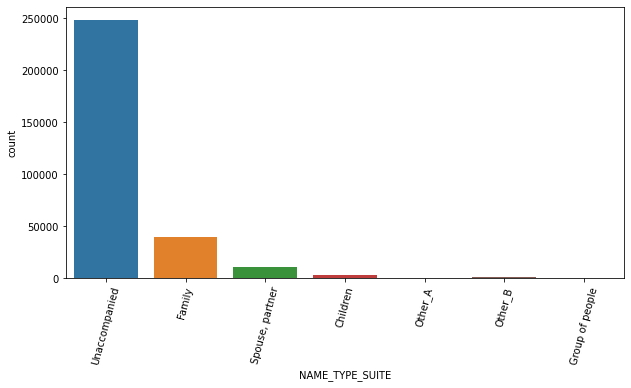

In [38]:
### Visualise the column

plt.figure(figsize = (10,5))
sns.countplot(data = ap, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 75)
plt.show()

Unaccompanied has the highest values which means most of the applicants come alone while applying for loan.
We can replace the missing values with "Unaccompanied"

In [39]:

### Replacing the missing values

ap["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace = True)


In [40]:
#### Analysing OBS_30_CNT_SOCIAL_CIRCLE Column

ap.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    163910
1.0     48783
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [41]:
## Statsitical Summary of this column

ap.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

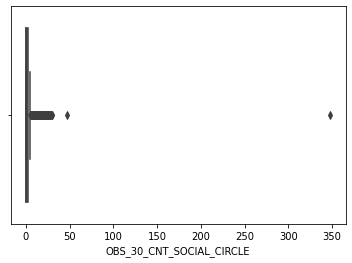

In [42]:
## Visulising this column

sns.boxplot(ap.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [43]:
### Checking Mode, Mean and Median

print(ap.OBS_30_CNT_SOCIAL_CIRCLE.mode())
print(ap.OBS_30_CNT_SOCIAL_CIRCLE.median())
print(ap.OBS_30_CNT_SOCIAL_CIRCLE.mean())


0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
0.0
1.4222454239942575


Observations:-
1. Looking at the boxplot, median is 0.0
2. Most recurring value is 0.0
3. Mean value is 1.4222454239942575
4. There are two outlier values at 50 and 350.
5. Mean and mode are closer and can be used for imputation. Using Median Value

In [44]:
### Replacing the missing values

ap["OBS_30_CNT_SOCIAL_CIRCLE"].fillna("ap.OBS_30_CNT_SOCIAL_CIRCLE.median()", inplace = True)


In [45]:
## Analysing DEF_30_CNT_SOCIAL_CIRCLE column

ap.DEF_30_CNT_SOCIAL_CIRCLE.value_counts() 

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [46]:
## Statistical Summary of  DEF_30_CNT_SOCIAL_CIRCLE column

ap.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

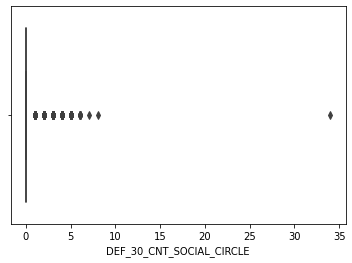

In [47]:
### Visulaise this column

sns.boxplot(ap.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [48]:
### Checking Mode, Mean and Median

print(ap.DEF_30_CNT_SOCIAL_CIRCLE.mode())
print(ap.DEF_30_CNT_SOCIAL_CIRCLE.median())
print(ap.DEF_30_CNT_SOCIAL_CIRCLE.mean())

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
0.0
0.1434206662533851


Observations:-
1. Looking at the boxplot, median is 0.0
2. Most recurring value is 0.0
3. Mean value is 0.1434206662533851
4.  There are ~7 outliers the largest of which is ~33.
5. Mean and median are closer and can be used for imputation. Using Median Value

In [49]:
### Replacing the missing values

ap["DEF_30_CNT_SOCIAL_CIRCLE"].fillna("ap.DEF_30_CNT_SOCIAL_CIRCLE.median()", inplace = True)

In [50]:
## Analysing OBS_60_CNT_SOCIAL_CIRCLE column

ap.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    164666
1.0     48870
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [51]:
## Statistical Summary of the column

ap.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

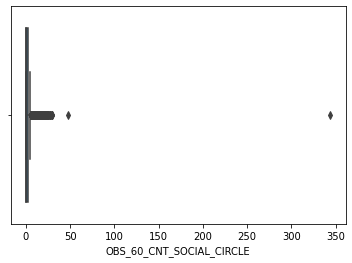

In [52]:
## Visualising the column

sns.boxplot(ap.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [53]:
### Checking Mode, Mean and Median

print(ap.OBS_60_CNT_SOCIAL_CIRCLE.mode())
print(ap.OBS_60_CNT_SOCIAL_CIRCLE.median())
print(ap.OBS_60_CNT_SOCIAL_CIRCLE.mean())

0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
0.0
1.4052921791901856


Observations:-
1. Looking at the boxplot, median is 0.0
2. Most recurring value is 0.0
3. Mean value is 1.4052921791901856
4. There is a prominent outlier at 50 and 350 approximately.
5. Mean and median are closer and can be used for imputation. Will use Median

In [54]:
### Replacing the missing values

ap["OBS_60_CNT_SOCIAL_CIRCLE"].fillna("ap.OBS_60_CNT_SOCIAL_CIRCLE.median()", inplace = True)

In [55]:
### Analysis of DEF_60_CNT_SOCIAL_CIRCLE Column

ap.DEF_60_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    280721
1.0     21841
2.0      3170
3.0       598
4.0       135
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [56]:
### Statistical Summary of this column

ap.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

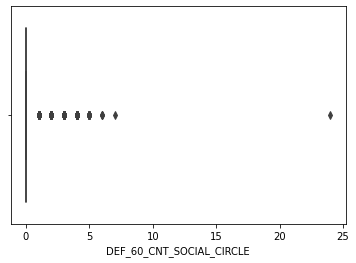

In [57]:
## Visualise the column

sns.boxplot(ap.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [58]:
### Checking Mode, Mean and Median

print(ap.DEF_60_CNT_SOCIAL_CIRCLE.mode())
print(ap.DEF_60_CNT_SOCIAL_CIRCLE.median())
print(ap.DEF_60_CNT_SOCIAL_CIRCLE.mean())

0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
0.0
0.10004894123788705


Observations:-
1. Looking at the boxplot, median is 0.0
2. Most recurring value is 0.0
3. Mean value is 0.10004894123788705
4. There are ~7 outliers the largest of which is ~24.
5. Mean and median are closer and can be used for imputation. We will use median

In [59]:
### Replacing the missing values

ap["DEF_60_CNT_SOCIAL_CIRCLE"].fillna("ap.DEF_60_CNT_SOCIAL_CIRCLE.median()", inplace = True)

In [60]:
### Analysis of EXT_SOURCE_2 Column

ap.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [61]:
### Statistical Summar of the column
ap.EXT_SOURCE_2.describe()


count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

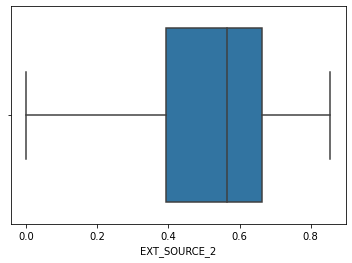

In [62]:
### Visualise the column

sns.boxplot(ap.EXT_SOURCE_2)
plt.show()

In [63]:
### Checking Mode, Mean and Median

print(ap.EXT_SOURCE_2.mode())
print(ap.EXT_SOURCE_2.median())
print(ap.EXT_SOURCE_2.mean())

0    0.285898
Name: EXT_SOURCE_2, dtype: float64
0.5659614260608526
0.5143926741308462


Observations:-
1. Looking at the boxplot, median is 0.565961
2. Most recurring value is 0.2858978721410488
3. Mean value is 0.5143926741308463
4. There is no outlier in the dataset
5. Mean and median are closer and can be used for imputation. We will use median

In [64]:
### Replacing the missing values

ap["EXT_SOURCE_2"].fillna("ap.EXT_SOURCE_2.median()", inplace = True)

In [65]:
#### Analysis of AMT_GOODS_PRICE Column

ap.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

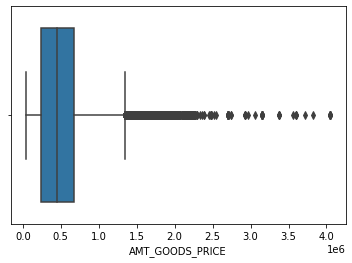

In [66]:
### Visualise thevcolumn

sns.boxplot(ap.AMT_GOODS_PRICE)
plt.show()

In [67]:
### Checking Mode, Mean and Median

print(ap.AMT_GOODS_PRICE.mode())
print(ap.AMT_GOODS_PRICE.median())
print(ap.AMT_GOODS_PRICE.mean())

0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895


Observations
1. Looking at the boxplot, median is 450000.0
2. Most recurring value is 450000.0. So, median and mode are the same
3. Mean value is 538396.2074288895
4. Though there are values above 2500000 they cannot be treated as outliers as it could be a valid goods price
5. Mean and median are exactly same and can be used for imputation. We will use median

In [68]:
### Replacing the missing values

ap["AMT_GOODS_PRICE"].fillna("ap.AMT_GOODS_PRICE.median()", inplace = True)

Dealing with incorrect/unknown values

In [69]:
#### Analysis of ORGANIZATION_TYPE Column

ap['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [70]:
#### We have invalied value of XNA. As we have lot of rows with XNA for this column, therefore decided to drop all the rows with XNA

ap=ap.drop(ap.loc[ap['ORGANIZATION_TYPE']=='XNA'].index)
ap[ap['ORGANIZATION_TYPE']=='XNA'].shape


(0, 73)

In [71]:
#### Analysis of CODE_GENDER Column

ap['CODE_GENDER'].value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

In [72]:
#### We have invalied value of XNA. We need to fix it as gender can be either Male or Female

### Checking mode of the column

ap['CODE_GENDER'].mode()

0    F
Name: CODE_GENDER, dtype: object

In [73]:
### Female applicants are almost twice the number of male applicants. Therefore replacing the XNA values with F

ap['CODE_GENDER'] = ap['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [74]:
### checking if XNA is removed

ap['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [75]:
#### Analysis of DAYS_BIRTH Column

ap['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-24617     1
-22311     1
-23473     1
-24763     1
-24319     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [76]:
### There are negative values present in this column. Checking the numnber of negative values

ap['DAYS_BIRTH'].nunique()

16513

In [77]:
### There are 17K negative values. We will convert those to positive values

ap['DAYS_BIRTH']= abs(ap['DAYS_BIRTH'])

In [78]:
### rechcking the column

ap['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
10292    40
         ..
24617     1
22311     1
23473     1
24763     1
24319     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [79]:
### Creating a new column YEARS_BIRTH to take the year Values

ap['YEARS_BIRTH'] = ap['DAYS_BIRTH'].apply(lambda x: round(x/365))

In [80]:
### checking to see if the new column as been created or not

ap['YEARS_BIRTH'].head()

0    26
1    46
2    52
3    52
4    55
Name: YEARS_BIRTH, dtype: int64

In [81]:
### Analysis of NAME_FAMILY_STATUS Column

ap['NAME_FAMILY_STATUS'].value_counts()

Married                 163914
Single / not married     39316
Civil marriage           26197
Separated                16000
Widow                     6708
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [82]:
### We have UNKNOWN Values present in the dataset.
### Checking mode of the column

ap['NAME_FAMILY_STATUS'].mode()

0    Married
Name: NAME_FAMILY_STATUS, dtype: object

In [83]:
### Married has the highest values in this column. Therefore replacing the UNKNOWN values with Married

ap['NAME_FAMILY_STATUS'] = ap['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

In [84]:
### Checking if Unknown has been replaced or not

ap['NAME_FAMILY_STATUS'].value_counts()

Married                 163916
Single / not married     39316
Civil marriage           26197
Separated                16000
Widow                     6708
Name: NAME_FAMILY_STATUS, dtype: int64

In [85]:
### Analysis of DAYS_EMPLOYED column

ap['DAYS_EMPLOYED'].value_counts().head()

-200    156
-224    152
-199    151
-230    151
-212    150
Name: DAYS_EMPLOYED, dtype: int64

In [86]:
## Checking len of records below 365243
len(ap[ap['DAYS_EMPLOYED'] < 365243])

252137

In [87]:
### checking number of unique values

ap['DAYS_EMPLOYED'].nunique()

12573

Observations:-

1. There are ~55K+ records for which `DAYS_EMPLOYED` is 365243 days
2. Remaining 252K+ records have negative value for days
3. There are 12,574 unique values for `DAYS_EMPLOYED`

Steps-

1. Converting the negative values to positive.
2. For records with DAYS_EMPLOYED as 365243 days which converting to years will be 1000 years seems invalid. We will not make any changes. Will check the income type for these records

In [88]:
### Converting the negative values to positive

ap['DAYS_EMPLOYED']= abs(ap['DAYS_EMPLOYED'])

In [89]:
## Cheking Income the Type for these records

ap[ap['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Series([], Name: NAME_INCOME_TYPE, dtype: int64)

In [90]:
### Creating a new column called YEARS_EMPLOYED

ap['YEARS_EMPLOYED'] = ap['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [91]:
### Checking if the new column has been created or not

ap['YEARS_EMPLOYED'].head()

0    2
1    3
2    1
3    8
4    8
Name: YEARS_EMPLOYED, dtype: int64

In [92]:
### Analysis of DAYS_REGISTRATION Column

ap['DAYS_REGISTRATION'].value_counts().head()

-1.0    91
-6.0    84
-2.0    82
-7.0    81
-4.0    78
Name: DAYS_REGISTRATION, dtype: int64

In [93]:
### Converting the negative values to positive

ap['DAYS_REGISTRATION']= abs(ap['DAYS_REGISTRATION'])

In [94]:
## Checking if the negative values are removed or not

ap['DAYS_REGISTRATION'].value_counts().head()

1.0    91
6.0    84
2.0    82
7.0    81
4.0    78
Name: DAYS_REGISTRATION, dtype: int64

In [95]:
### Creating a new column YEARS_REGISTRATION to capture the years

ap['YEARS_REGISTRATION'] = ap['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

In [96]:
## checking if the column has been created or not

ap['YEARS_REGISTRATION'].head()

0    10
1     3
2    12
3    27
4    12
Name: YEARS_REGISTRATION, dtype: int64

In [97]:
### Analysis of DAYS_ID_PUBLISH column

ap['DAYS_ID_PUBLISH'].value_counts().head()

-4032    112
-4166    112
-4053    111
-4256    110
-4081    110
Name: DAYS_ID_PUBLISH, dtype: int64

In [98]:
### Converting the negative values to positive

ap['DAYS_ID_PUBLISH']= abs(ap['DAYS_ID_PUBLISH'])

In [99]:
## Checking if the negative values are removed or not

ap['DAYS_ID_PUBLISH'].value_counts().head()

4032    112
4166    112
4053    111
4256    110
4081    110
Name: DAYS_ID_PUBLISH, dtype: int64

In [100]:
### Creating a new column YEARS_REGISTRATION to capture the years

ap['YEARS_ID_PUBLISH'] = ap['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

In [101]:
## checking if the column has been created or not

ap['YEARS_ID_PUBLISH'].head()

0    6
1    1
2    7
3    7
4    9
Name: YEARS_ID_PUBLISH, dtype: int64

In [102]:
### Analysis of DAYS_LAST_PHONE_CHANGE column 

ap['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

 0.0    28889
-1.0     2372
-2.0     1789
-3.0     1467
-4.0     1166
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [103]:
### Converting the negative values to positive

ap['DAYS_LAST_PHONE_CHANGE']= abs(ap['DAYS_LAST_PHONE_CHANGE'])

In [104]:
## Checking if the negative values are removed or not

ap['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

0.0    28889
1.0     2372
2.0     1789
3.0     1467
4.0     1166
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [105]:
### Creating a new column YEARS_REGISTRATION to capture the years

ap['YEARS_LAST_PHONE_CHANGE'] = ap['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

In [106]:
## checking if the column has been created or not

ap['YEARS_LAST_PHONE_CHANGE'].head()

0    3.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [107]:
# Removing some unnecessary columns for application data

ap = ap.drop(columns=['NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY'])
ap

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,52,8,27,7,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Working,Secondary / secondary special,Separated,House / apartment,0.022625,16705,7258,9798.0,259,Sales staff,1.0,2,WEDNESDAY,11,Self-employed,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,46,20,27,1,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Sales staff,1.0,1,THURSDAY,15,Services,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,26,1,23,5,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,Managers,1.0,3,THURSDAY,9,School,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41,22,18,14,5.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,Laborers,2.0,2,WEDNESDAY,9,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,13,7,3,1.0


Creating Bins for the columns AMT_INCOME_RANGE, AMT_CREDIT_RANGE and Age columns for further analysis

In [108]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

ap['AMT_INCOME_RANGE']=pd.cut(ap['AMT_INCOME_TOTAL'],bins,labels=slot)

In [109]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

ap['AMT_CREDIT_RANGE']=pd.cut(ap['AMT_CREDIT'],bins=bins,labels=slots)

In [110]:
# Binnig the age column

bins = [0,30,40,50,60,100]
labels = ['0-30','30-40','40-50','50-60','60+']
ap['AGE_RANGE'] = pd.cut(ap.YEARS_BIRTH, bins=bins, labels=labels)
ap

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3.0,200000-225000,400000-450000,0-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2.0,250000-275000,900000 and above,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2.0,50000-75000,0-150000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,52,8,27,7,2.0,125000-150000,300000-350000,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3.0,100000-125000,500000-550000,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Working,Secondary / secondary special,Separated,House / apartment,0.022625,16705,7258,9798.0,259,Sales staff,1.0,2,WEDNESDAY,11,Self-employed,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,46,20,27,1,0.0,150000-175000,300000-350000,40-50
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Sales staff,1.0,1,THURSDAY,15,Services,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,26,1,23,5,1.0,150000-175000,250000-300000,0-30
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,Managers,1.0,3,THURSDAY,9,School,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41,22,18,14,5.0,150000-175000,650000-700000,40-50
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,Laborers,2.0,2,WEDNESDAY,9,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,13,7,3,1.0,150000-175000,350000-400000,30-40


Dealing with Outliers by plotting graphs

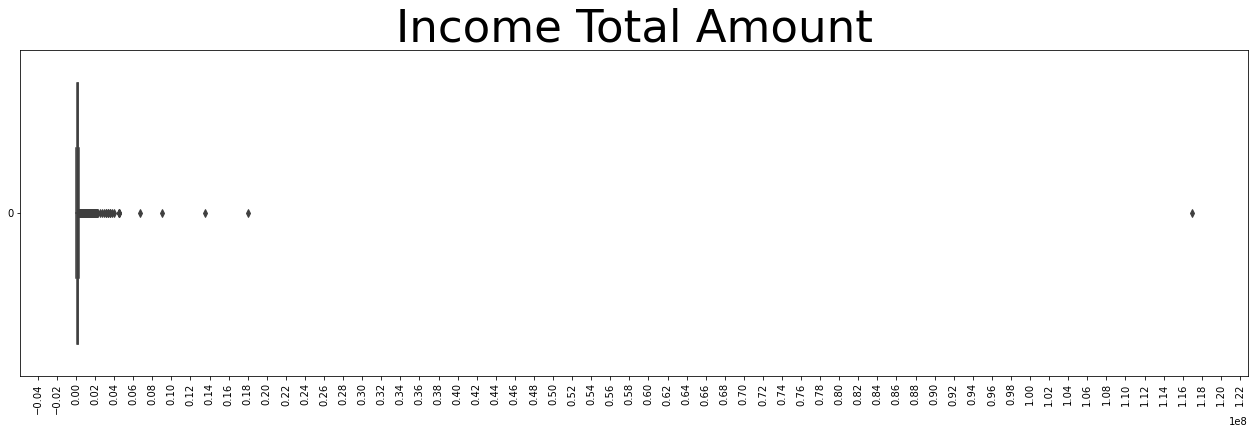

In [111]:
#Box Plot for AMT_INCOME_RANGE Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=ap.AMT_INCOME_TOTAL, orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.set_title('Income Total Amount',fontsize=45)
plt.xticks(rotation=90)
plt.show()


In [112]:
# Describing the AMT_INCOME_TOTAL column for max value

ap.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

As the max value is 1.17 X 10^8 which is a really high value but income can vary from people to people. Therefore, no operation is required in this

### AMT_CREDIT Variable

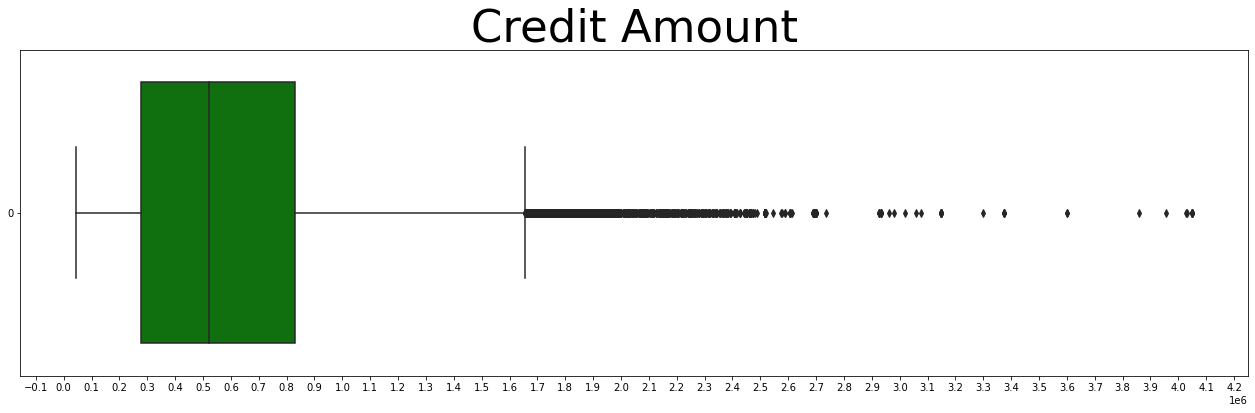

In [113]:
# Box Plot for AMT_CREDIT Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=ap.AMT_CREDIT,orient='h',color='green')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.set_title('Credit Amount',fontsize=45)
plt.show()

In [114]:
# Describing the AMT_CREDIT column 

ap.AMT_CREDIT.describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

The outliers value can handled by converting into bins which we already converted. New Column is AMT_CREDIT_RANGE Below is the box plot of that column

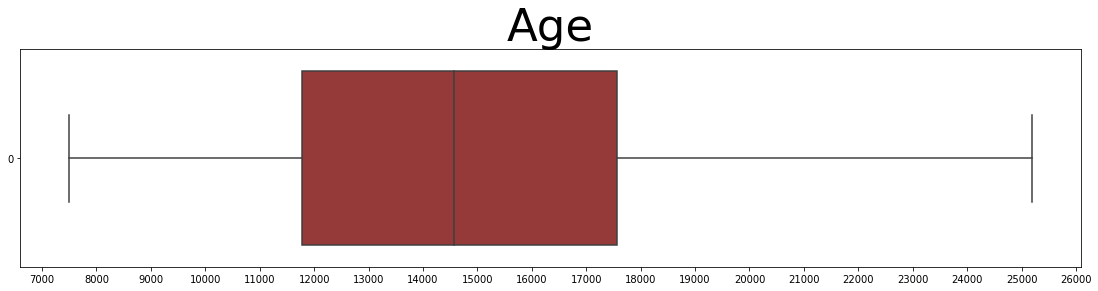

In [115]:
# Box Plot for DAYS_BIRTH Variable

fig = plt.figure(figsize=(19,4))
ax = sns.boxplot(data=ap.DAYS_BIRTH, orient='h',color='brown')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.set_title('Age',fontsize=45)
plt.show()

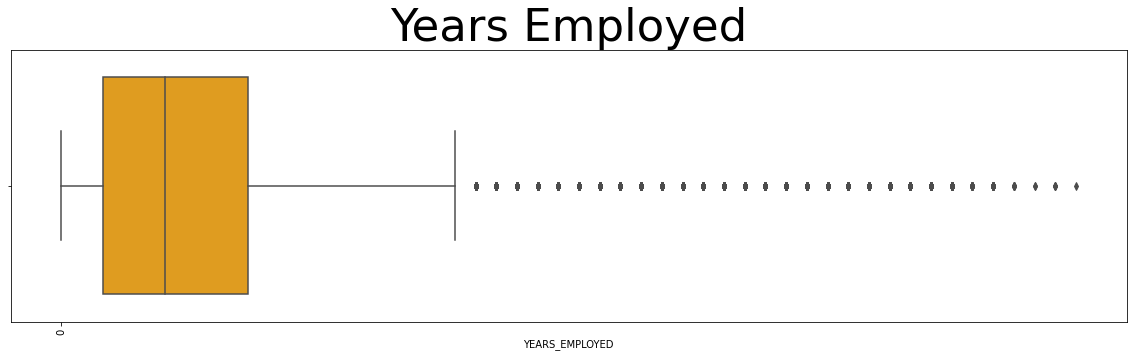

In [116]:
# Box Plot for YEARS_EMPLOYED Variable

fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(ap.YEARS_EMPLOYED, orient='h', color='orange')
ax.set_title('Years Employed',fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.xticks(rotation=90)
plt.show()

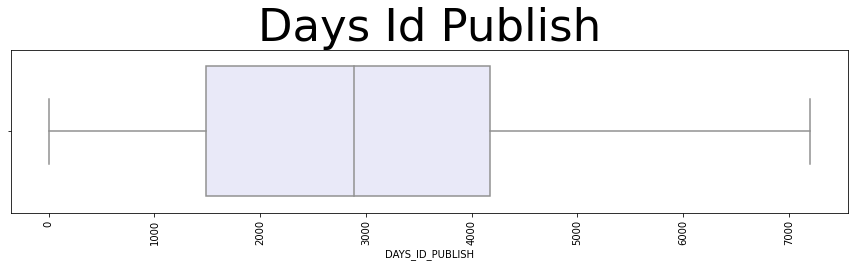

In [117]:
#  Box Plot for DAYS_ID_PUBLISH Variable

fig = plt.figure(figsize=(15,3))
ax = sns.boxplot(ap.DAYS_ID_PUBLISH,orient='h',color='lavender')
ax.set_title('Days Id Publish',fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.xticks(rotation=90)
plt.show()

Data Imbalance Check

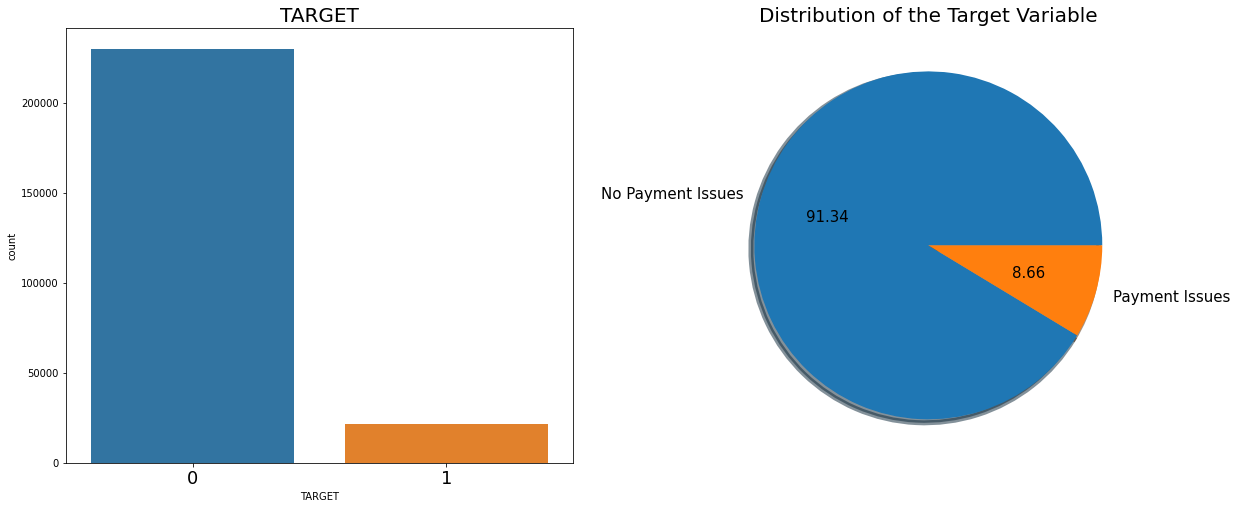

In [118]:
# Plotting the graphs   -- Target 0 is No Payment Issues and Target 1 is Payment Issues

fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(ap.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=ap.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [119]:
# Check the Imbalance Percentage

print('Imbalance Percentage is : %.2f'%(ap.TARGET.value_counts(normalize=True)[0]/ap.TARGET.value_counts(normalize=True)[1]))

Imbalance Percentage is : 10.55


In [120]:
# We can divide the dataset to two into different dataframes i.e. target=0 (client with no payment difficulties/non defaulters) & target=1 (client with payment difficulties/defaulters)
 
target0 = ap.loc[ap["TARGET"]==0]
target1 = ap.loc[ap["TARGET"]==1]

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [121]:
# Count plotting in logarithmic scale

def uniplot(ap,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(ap[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = ap, x= col, order=ap[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

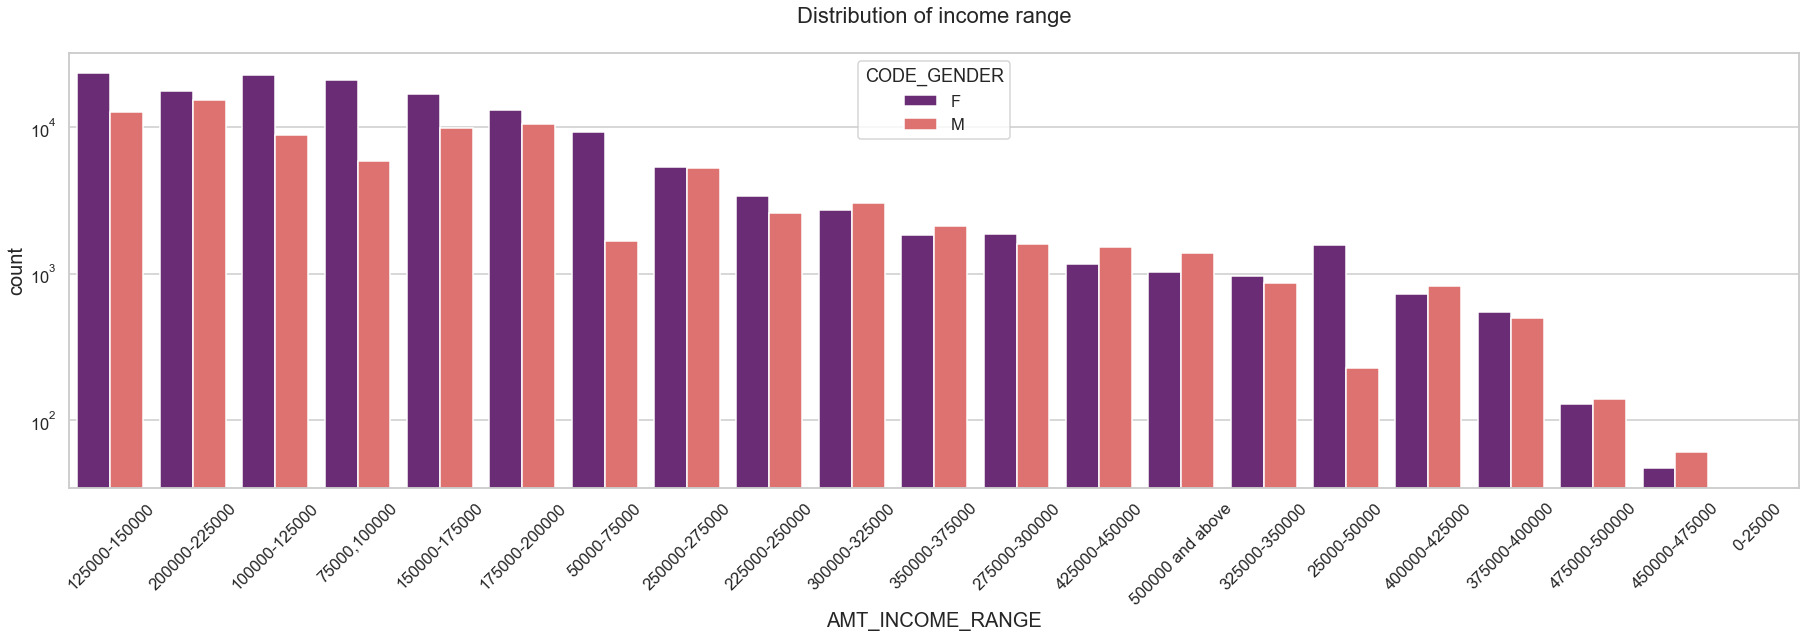

In [122]:
# PLotting for income range

uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Observations:-

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

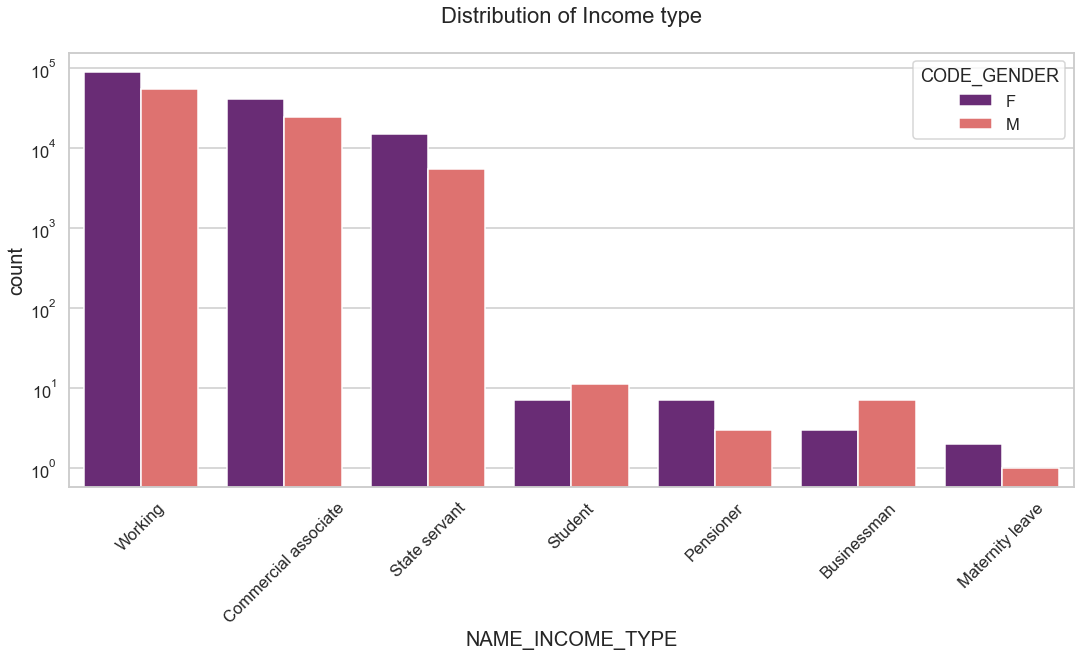

In [123]:
# Plotting for Income type

uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Observations:-

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

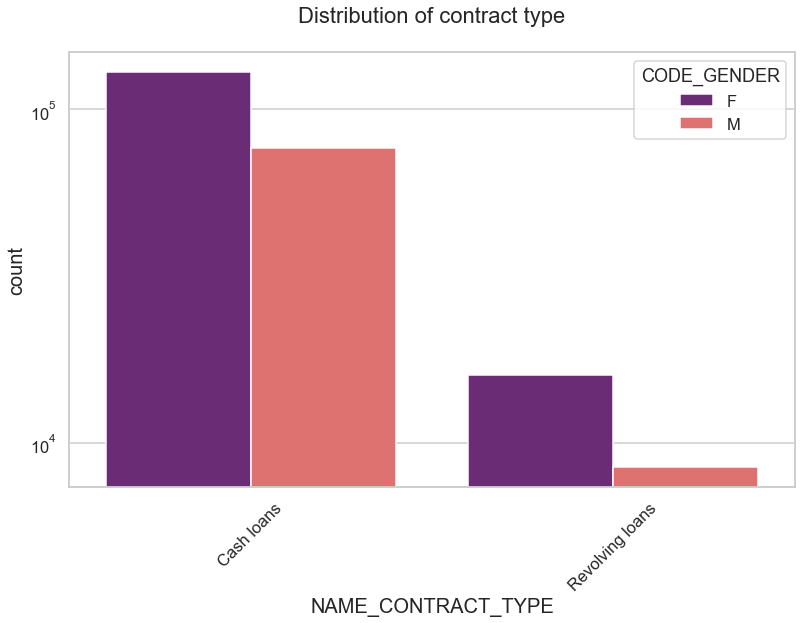

In [124]:
# Plotting for Contract type

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Observations:-

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

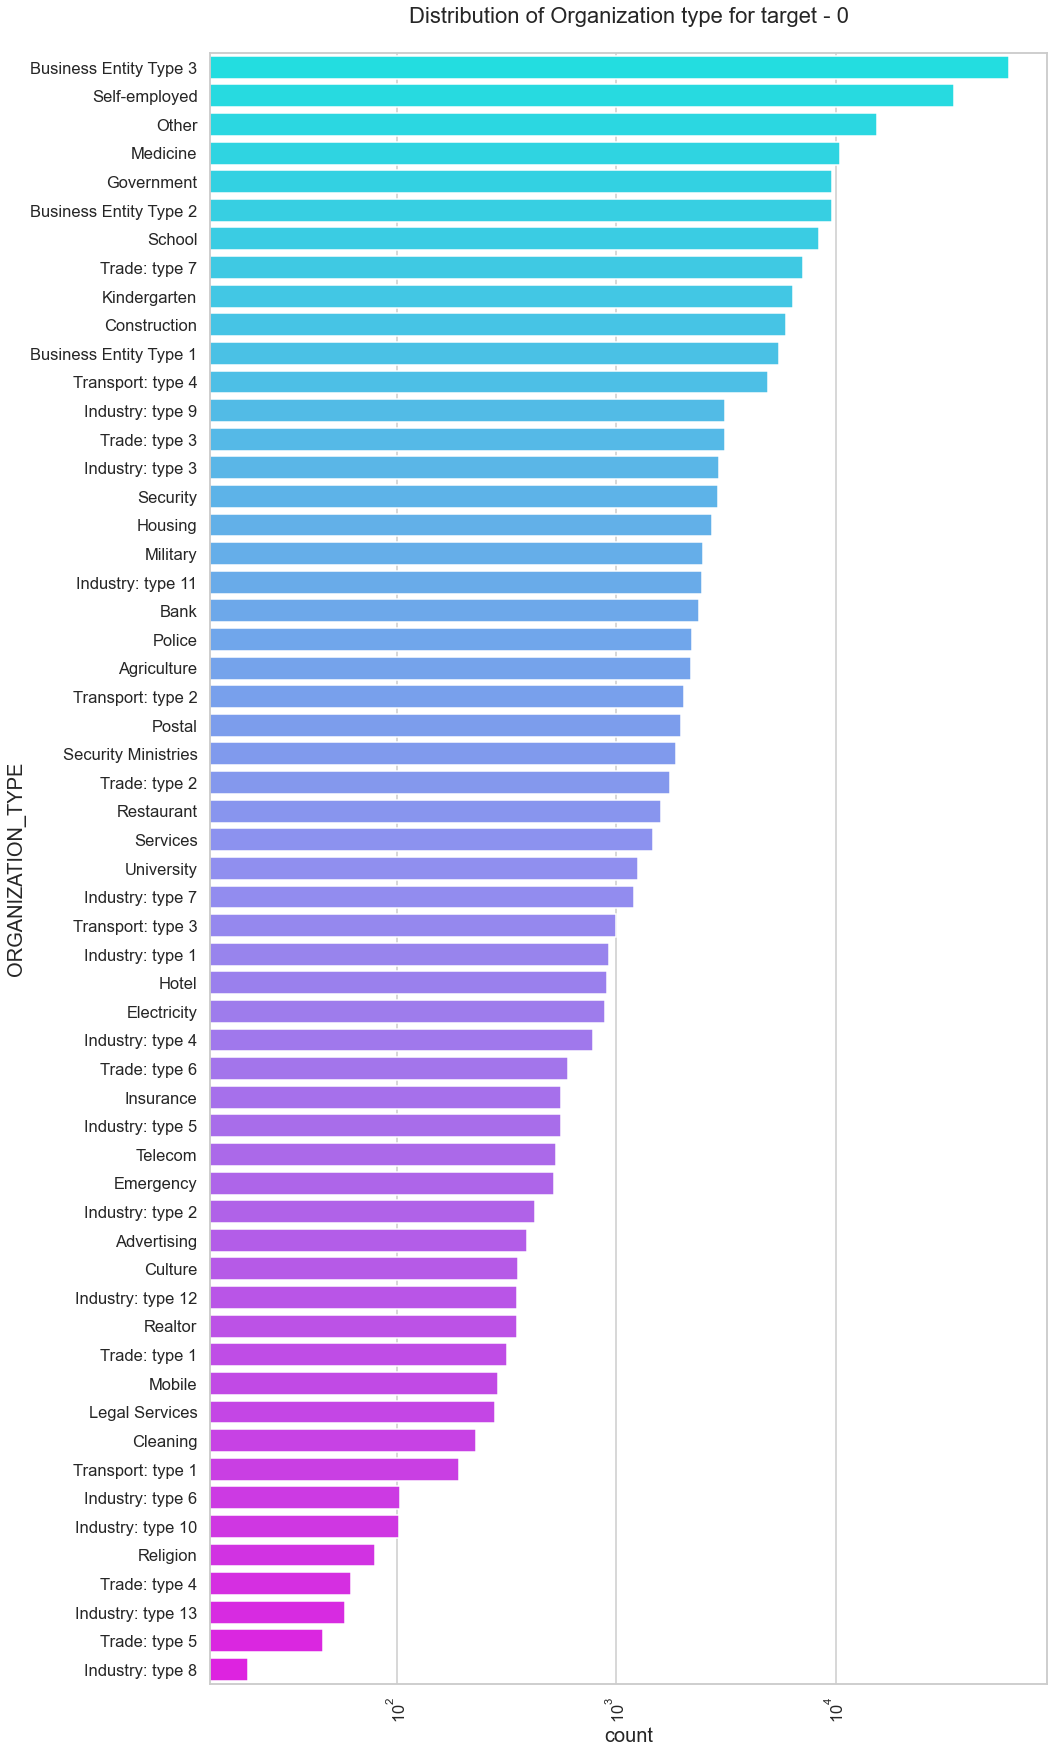

In [125]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

OPbservations:-

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

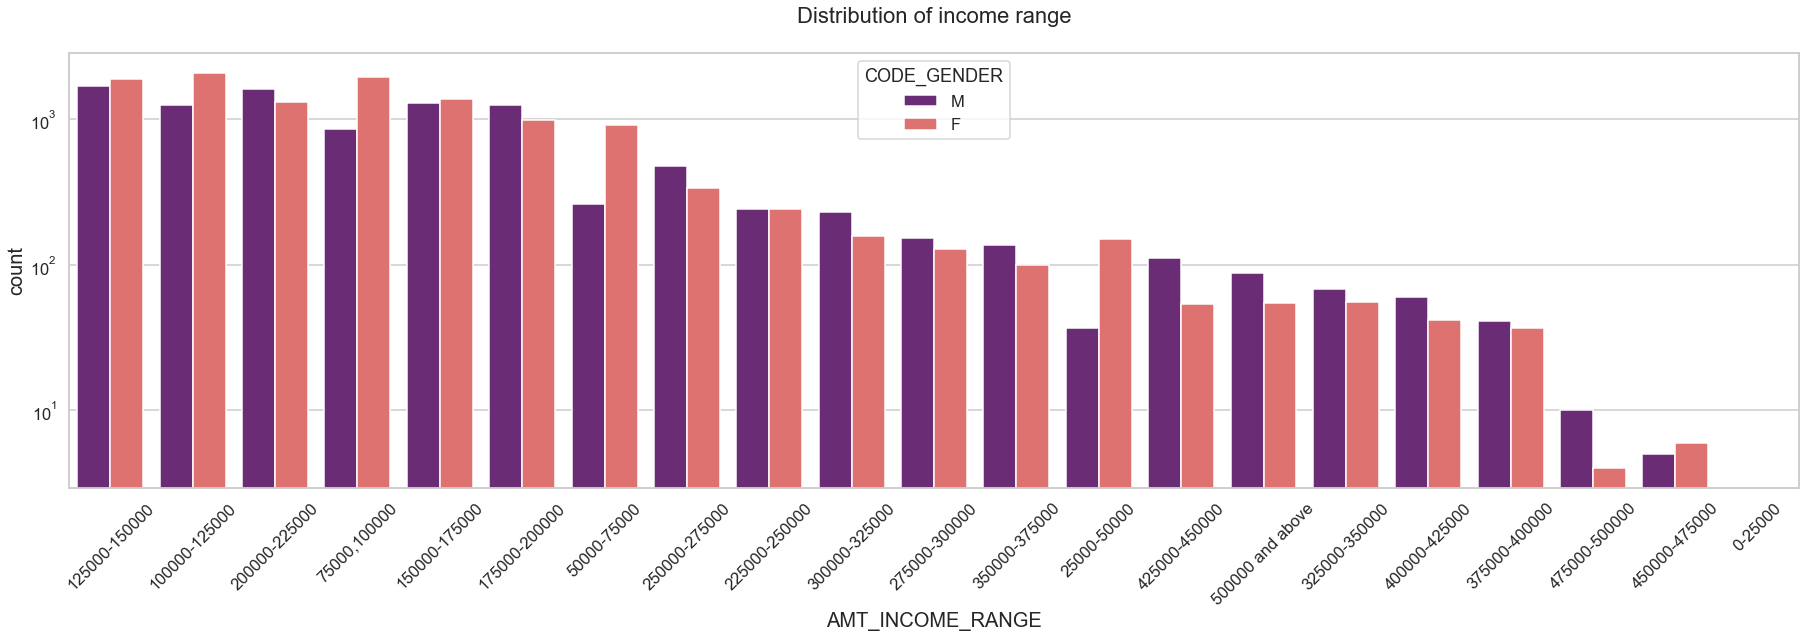

In [126]:
# PLotting for income range

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Observations:-

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.


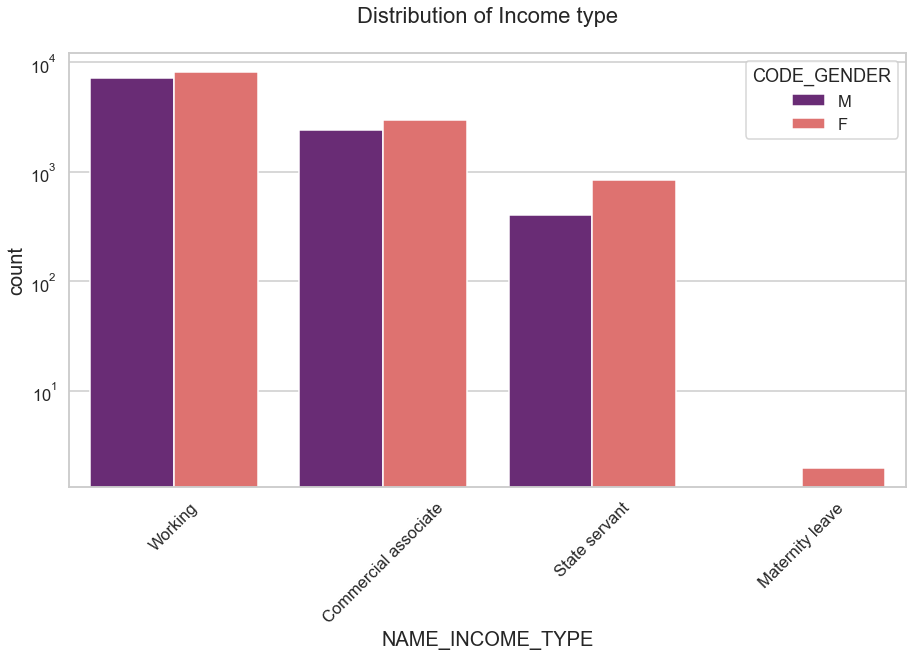

In [127]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Observations:-

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

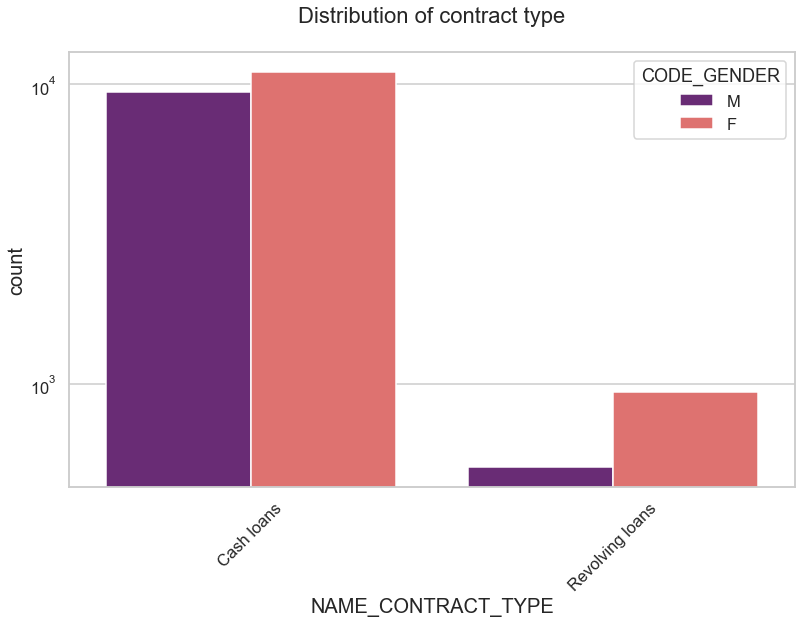

In [128]:
# Plotting for Contract type

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Observations:-

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

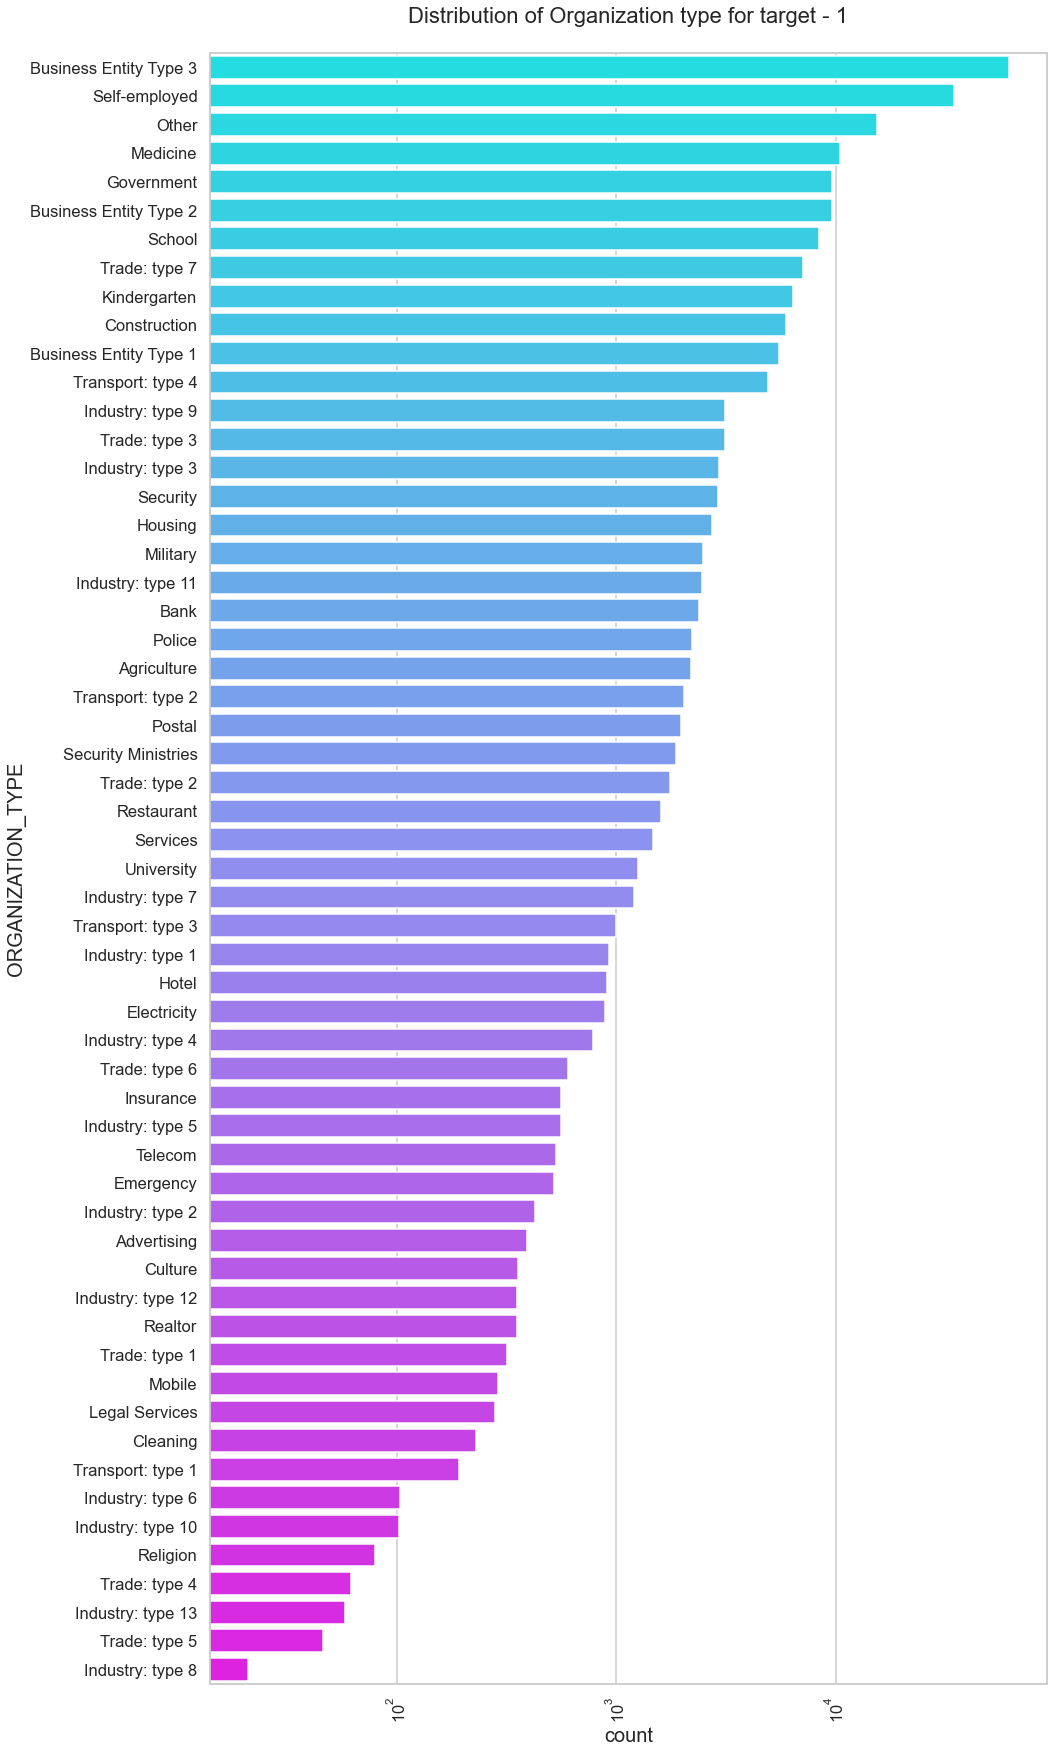

In [129]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Observations:-

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.


**Bivariate analysis for numerical variables**

**For Target 0**

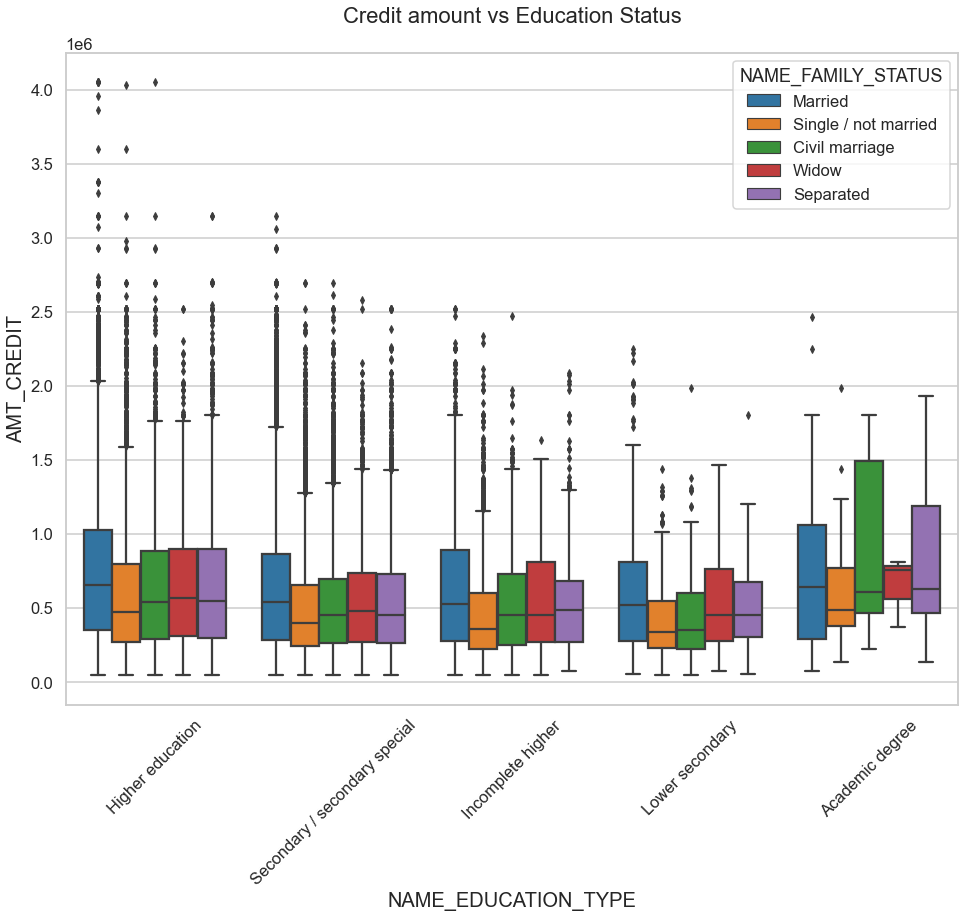

In [130]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that-

1. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
2. higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
3. Civil marriage for Academic degree is having most of the credits in the third quartile.

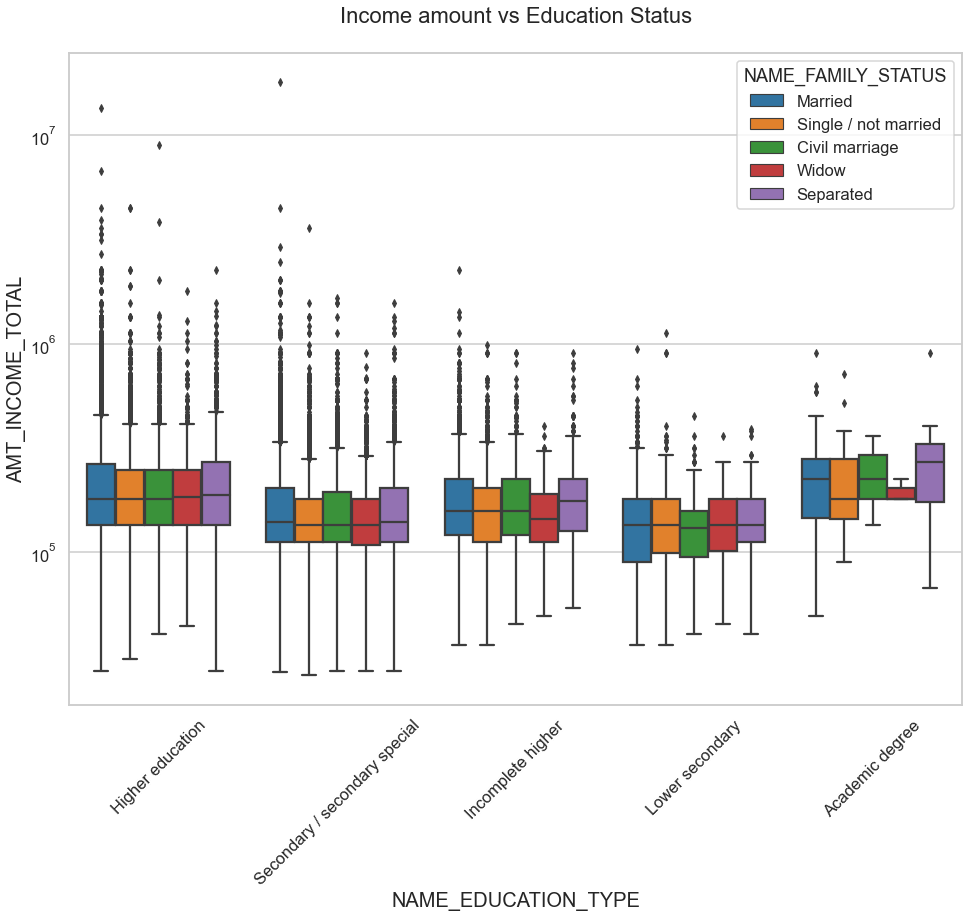

In [131]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot we can conclude that:-

1. For Education type 'Higher education' the income amount is mostly equal with family status.
2. Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

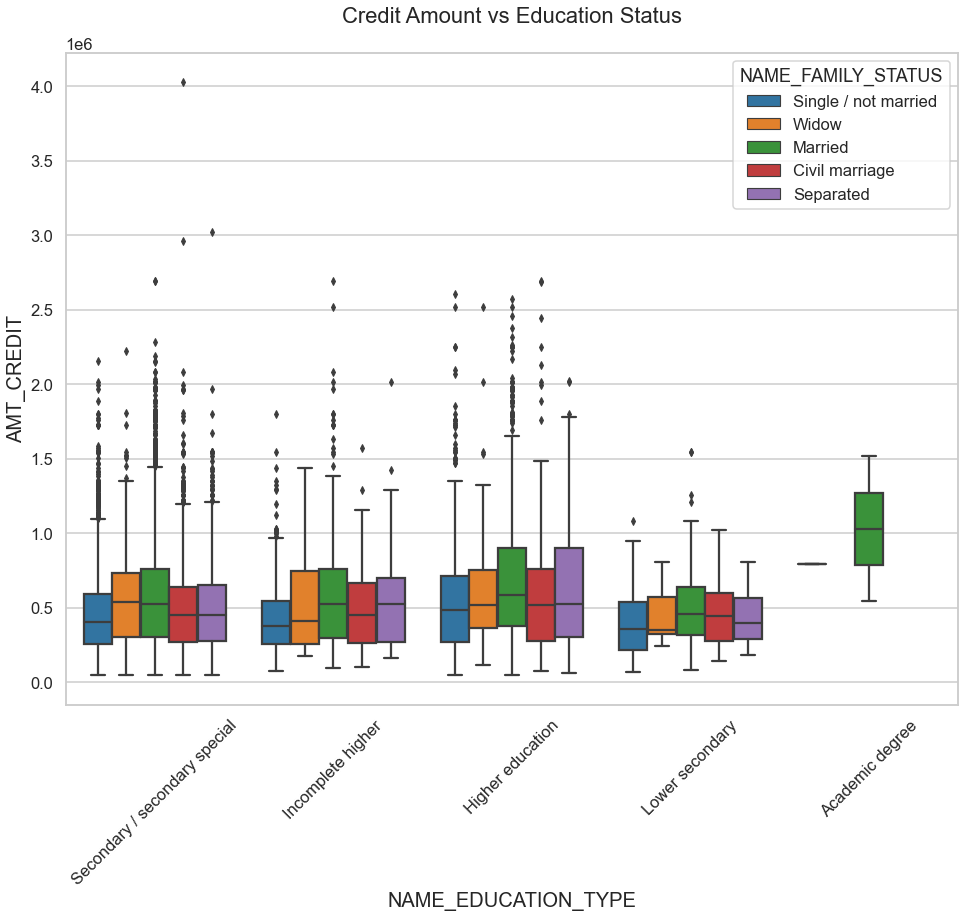

In [132]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

From the above box plot we can say that -

1. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
2. Civil marriage for Academic degree is having most of the credits in the third quartile.

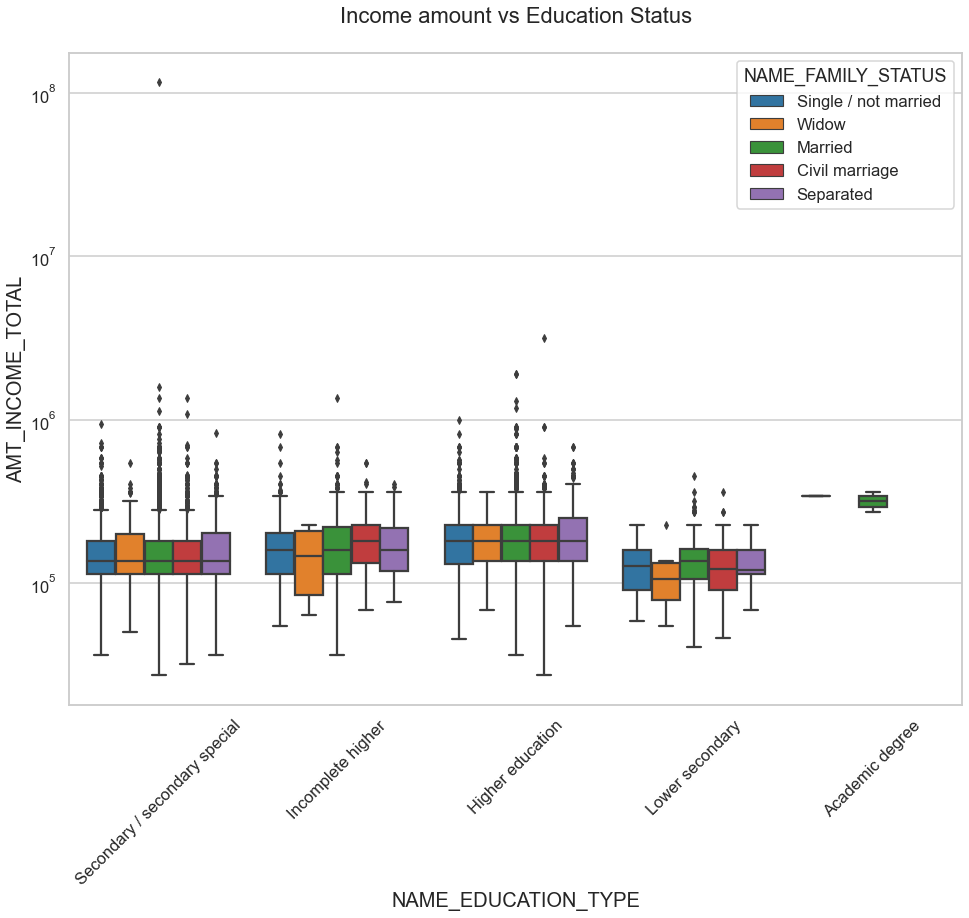

In [133]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()


From above boxplot we can conclude that -

1. For Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
2. Lower secondary are have less income amount than others.

### Correlation 
#### TARGET 0 : Loan Repayer

In [134]:
# Dropping the columns which are not required for target 0

cols_drop = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_BIRTH', 'YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']
target0 = target0.drop(columns=cols_drop)

In [135]:
# Creating the correlation matrix 

corr_t0 = target0.corr().abs().round(3)
corr_t0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
SK_ID_CURR,1.000,NaN,0.000,0.001,0.001,0.001,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000,NaN,1.000,0.010,0.019,0.008,0.030,0.242,0.063,0.163,0.118,0.893,0.037,0.033
AMT_INCOME_TOTAL,0.001,NaN,0.010,1.000,0.326,0.401,0.169,0.046,0.030,0.035,0.026,0.003,0.184,0.056
AMT_CREDIT,0.001,NaN,0.019,0.326,1.000,0.762,0.104,0.153,0.088,0.015,0.035,0.037,0.107,0.040
AMT_ANNUITY,0.001,NaN,0.008,0.401,0.762,1.000,0.122,0.092,0.052,0.010,0.026,0.041,0.132,0.034
REGION_POPULATION_RELATIVE,0.000,NaN,0.030,0.169,0.104,0.122,1.000,0.041,0.009,0.060,0.004,0.029,0.543,0.175
DAYS_BIRTH,0.001,NaN,0.242,0.046,0.153,0.092,0.041,1.000,0.353,0.299,0.108,0.178,0.037,0.049
DAYS_EMPLOYED,0.000,NaN,0.063,0.030,0.088,0.052,0.009,0.353,1.000,0.172,0.087,0.032,0.017,0.022
DAYS_REGISTRATION,0.000,NaN,0.163,0.035,0.015,0.010,0.060,0.299,0.172,1.000,0.030,0.156,0.094,0.032


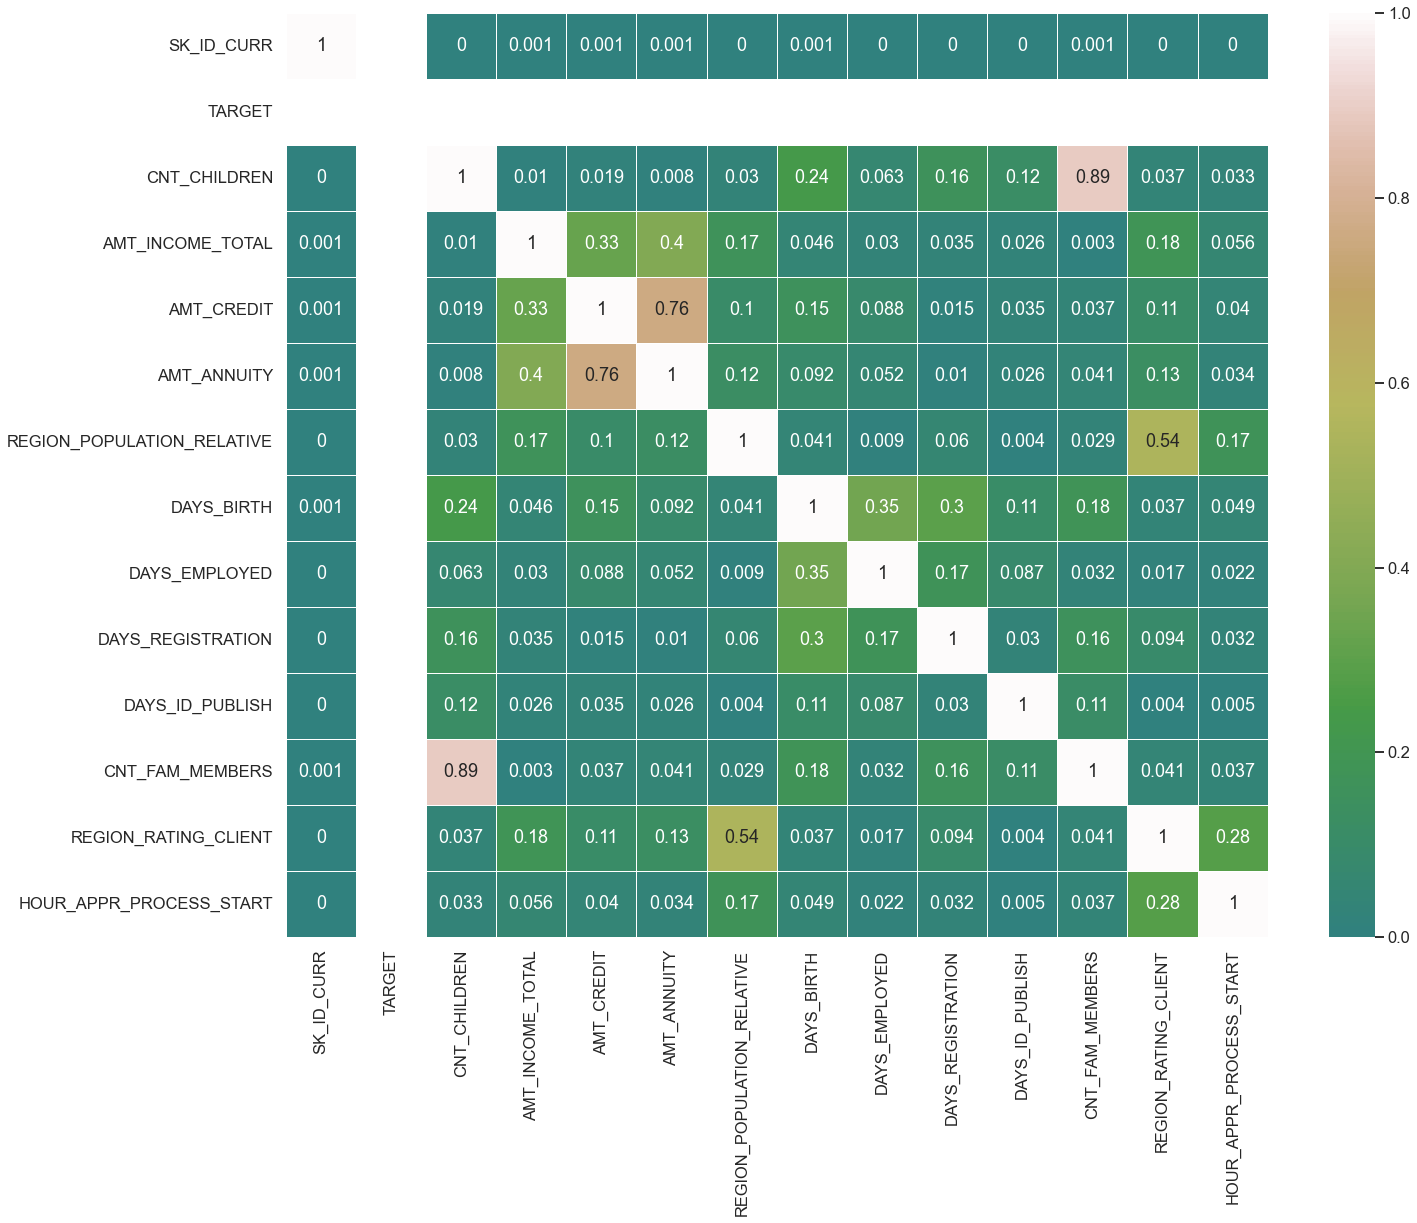

In [136]:
# Visualising the correlation data of target 0 using heatmaps

fig = plt.figure(figsize=(22,17))

sns.heatmap(data=corr_t0 ,linewidths=.7,center=0.3,cmap='gist_earth',annot= True)

plt.show()

In [137]:
# Unstacking the TARGET_0 variable

c = corr_t0 .abs()
s = c.unstack()

In [138]:
# Finding top 10 correlation among the people with no payment issues and displaying it.

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target0 = pd.DataFrame(target_0_corr)

top_10_target0 = top_10_target0.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target0.head(10)

,Var1,Var2,Correlation
0,CNT_CHILDREN,CNT_FAM_MEMBERS,0.893
1,AMT_ANNUITY,AMT_CREDIT,0.762
2,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.543
3,AMT_ANNUITY,AMT_INCOME_TOTAL,0.401
4,DAYS_BIRTH,DAYS_EMPLOYED,0.353
5,AMT_CREDIT,AMT_INCOME_TOTAL,0.326
6,DAYS_REGISTRATION,DAYS_BIRTH,0.299
7,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,0.279
8,CNT_CHILDREN,DAYS_BIRTH,0.242
9,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,0.184


### TARGET 1 : Loan Defaulter

In [139]:
# Dropping the columns which are not required for target1

target1 = target1.drop(columns=cols_drop)

In [140]:
# Creating the correlation matrix 

corr_t1 = target1.corr().abs().round(3)
corr_t1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
SK_ID_CURR,1.000,NaN,0.007,0.011,0.001,0.007,0.008,0.005,0.000,0.004,0.003,0.005,0.008,0.004
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.007,NaN,1.000,0.002,0.002,0.016,0.032,0.177,0.033,0.126,0.090,0.894,0.047,0.039
AMT_INCOME_TOTAL,0.011,NaN,0.002,1.000,0.036,0.043,0.008,0.008,0.000,0.004,0.009,0.004,0.021,0.013
AMT_CREDIT,0.001,NaN,0.002,0.036,1.000,0.749,0.069,0.190,0.106,0.033,0.062,0.045,0.061,0.029
AMT_ANNUITY,0.007,NaN,0.016,0.043,0.749,1.000,0.074,0.090,0.049,0.014,0.044,0.055,0.076,0.023
REGION_POPULATION_RELATIVE,0.008,NaN,0.032,0.008,0.069,0.074,1.000,0.050,0.016,0.056,0.012,0.031,0.443,0.144
DAYS_BIRTH,0.005,NaN,0.177,0.008,0.190,0.090,0.050,1.000,0.307,0.241,0.136,0.110,0.049,0.035
DAYS_EMPLOYED,0.000,NaN,0.033,0.000,0.106,0.049,0.016,0.307,1.000,0.137,0.097,0.002,0.007,0.000
DAYS_REGISTRATION,0.004,NaN,0.126,0.004,0.033,0.014,0.056,0.241,0.137,1.000,0.050,0.124,0.112,0.048


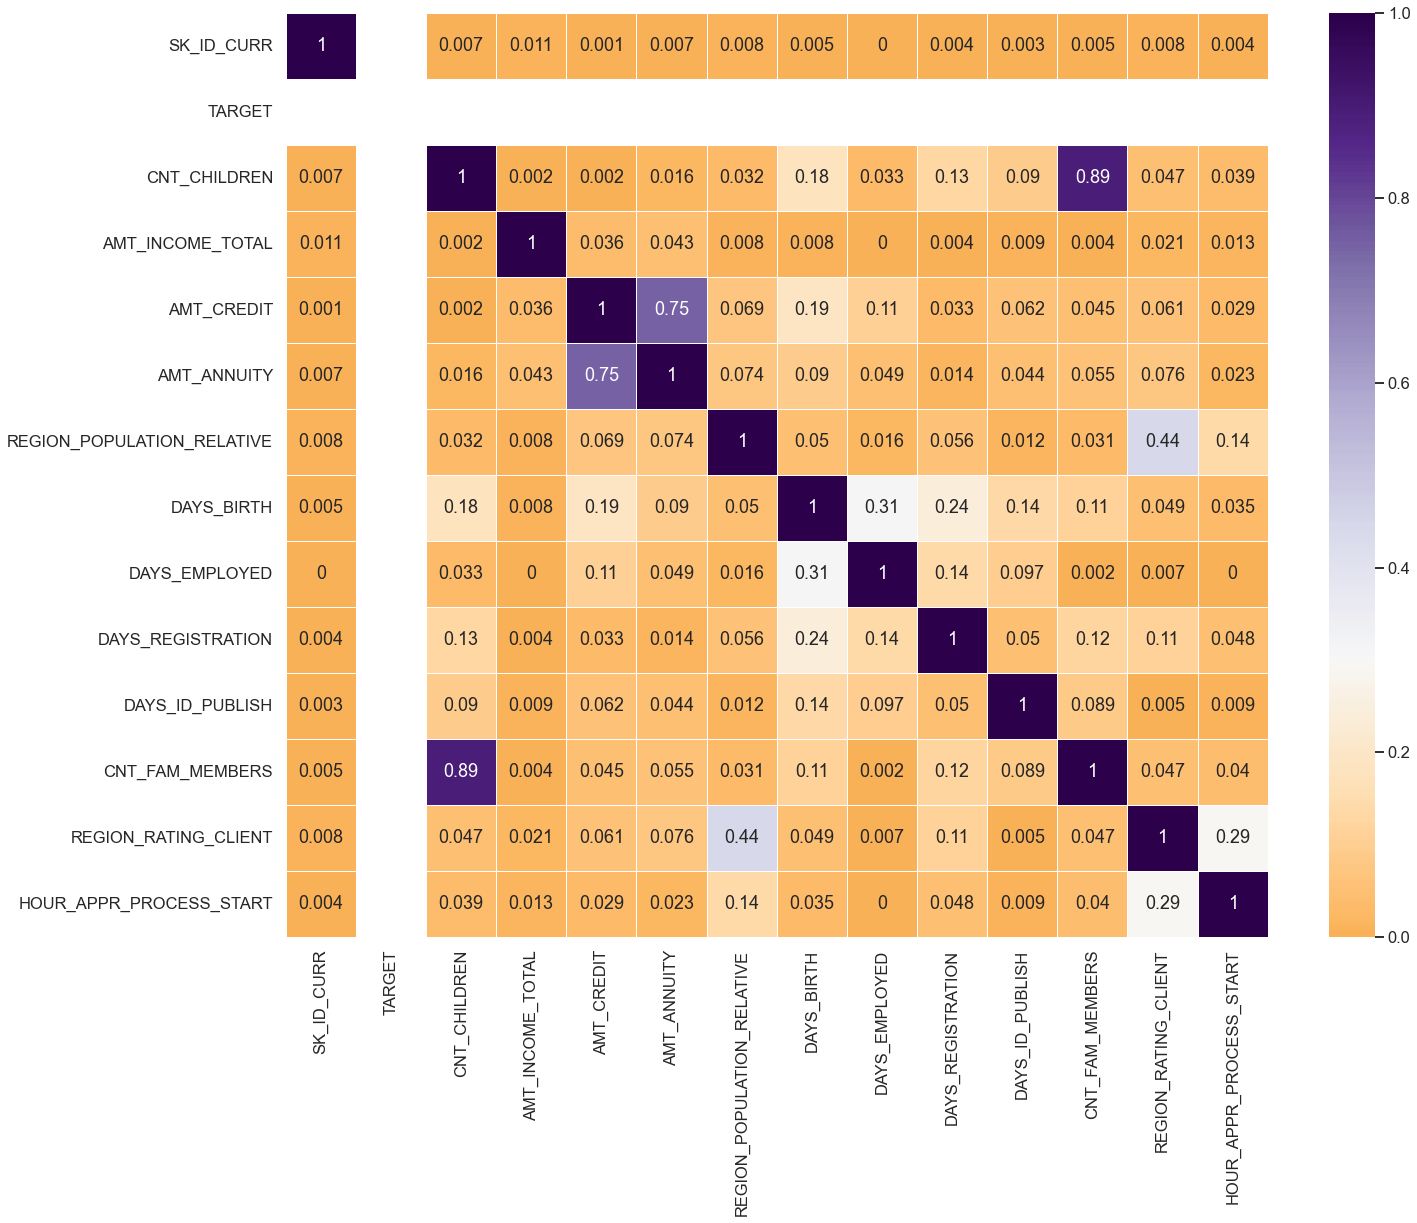

In [141]:
# PLotting the heatmap for displaying the correlation for target 1

fig = plt.figure(figsize=(22,17))

sns.heatmap(data=corr_t1,annot=True,cmap='PuOr',linewidths=0.7,center=0.3)

plt.show()

In [142]:
#unstacking the correlation of target1 variable
c1 = corr_t1

s1 = c1.unstack()

In [143]:
# Displaying Top 10 Correlations from target_1 :

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target1  = pd.DataFrame(target_1_corr)

top_10_target1 = top_10_target1.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target1.head(10)

,Var1,Var2,Correlation
0,CNT_CHILDREN,CNT_FAM_MEMBERS,0.894
1,AMT_ANNUITY,AMT_CREDIT,0.749
2,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.443
3,DAYS_BIRTH,DAYS_EMPLOYED,0.307
4,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,0.290
5,DAYS_BIRTH,DAYS_REGISTRATION,0.241
6,AMT_CREDIT,DAYS_BIRTH,0.190
7,DAYS_BIRTH,CNT_CHILDREN,0.177
8,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,0.144
9,DAYS_EMPLOYED,DAYS_REGISTRATION,0.137


### Insights from Correlation

1. Credit amount is highly correlated with amount of goods pricefor the Client with payment difficulties (Target 1)

2. The correlation is strong between family member and children counts with payment difficulties (Target 1)

3. Days_birth and number of children also has a correlation.



In [144]:
### Checking the Previous Application Dataset

py.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# Cleaning the missing data

# listing the null values columns having more than 30%

py_null=py.isnull().sum()
py_null=py_null[py_null.values>(0.3*len(py_null))]
len(py_null)


15

In [146]:
# Removing those 15 columns

py_null = list(py_null[py_null.values>=0.3].index)
py.drop(labels=py_null,axis=1,inplace=True)

py.shape

(1670214, 22)

In [147]:
# Removing the column values of 'XNA' and 'XAP'

py=py.drop(py[py['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
py=py.drop(py[py['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
py=py.drop(py[py['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

py.shape

(69635, 22)

Merging both the Datasets and performing Analysis

In [148]:
##Merging

new_df=pd.merge(left=ap,right=py,how='inner',on='SK_ID_CURR',suffixes='_x')

In [149]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [150]:
['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

['REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [151]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [152]:
### Checking the Columns

new_df1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,1.0,2,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,28,3,13,8,2.0,"75000,100000",150000-200000,0-30,1390369,Cash loans,94500.0,109971.0,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Laborers,2.0,2,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42,7,14,10,4.0,275000-300000,650000-700000,40-50,1344613,Cash loans,1260000.0,1260000.0,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,2,Self-employed,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,32,6,10,10,2.0,350000-375000,700000-750000,30-40,1077565,Cash loans,1350000.0,1487214.0,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,Business Entity Type 3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,5,23,12,1.0,175000-200000,500000-550000,40-50,1223113,Cash loans,337500.0,407911.5,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,2,Business Entity Type 3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,44,5,23,12,1.0,175000-200000,500000-550000,40-50,1529558,Cash loans,450000.0,555723.0,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


### Univariate analysis on Merged Dataset

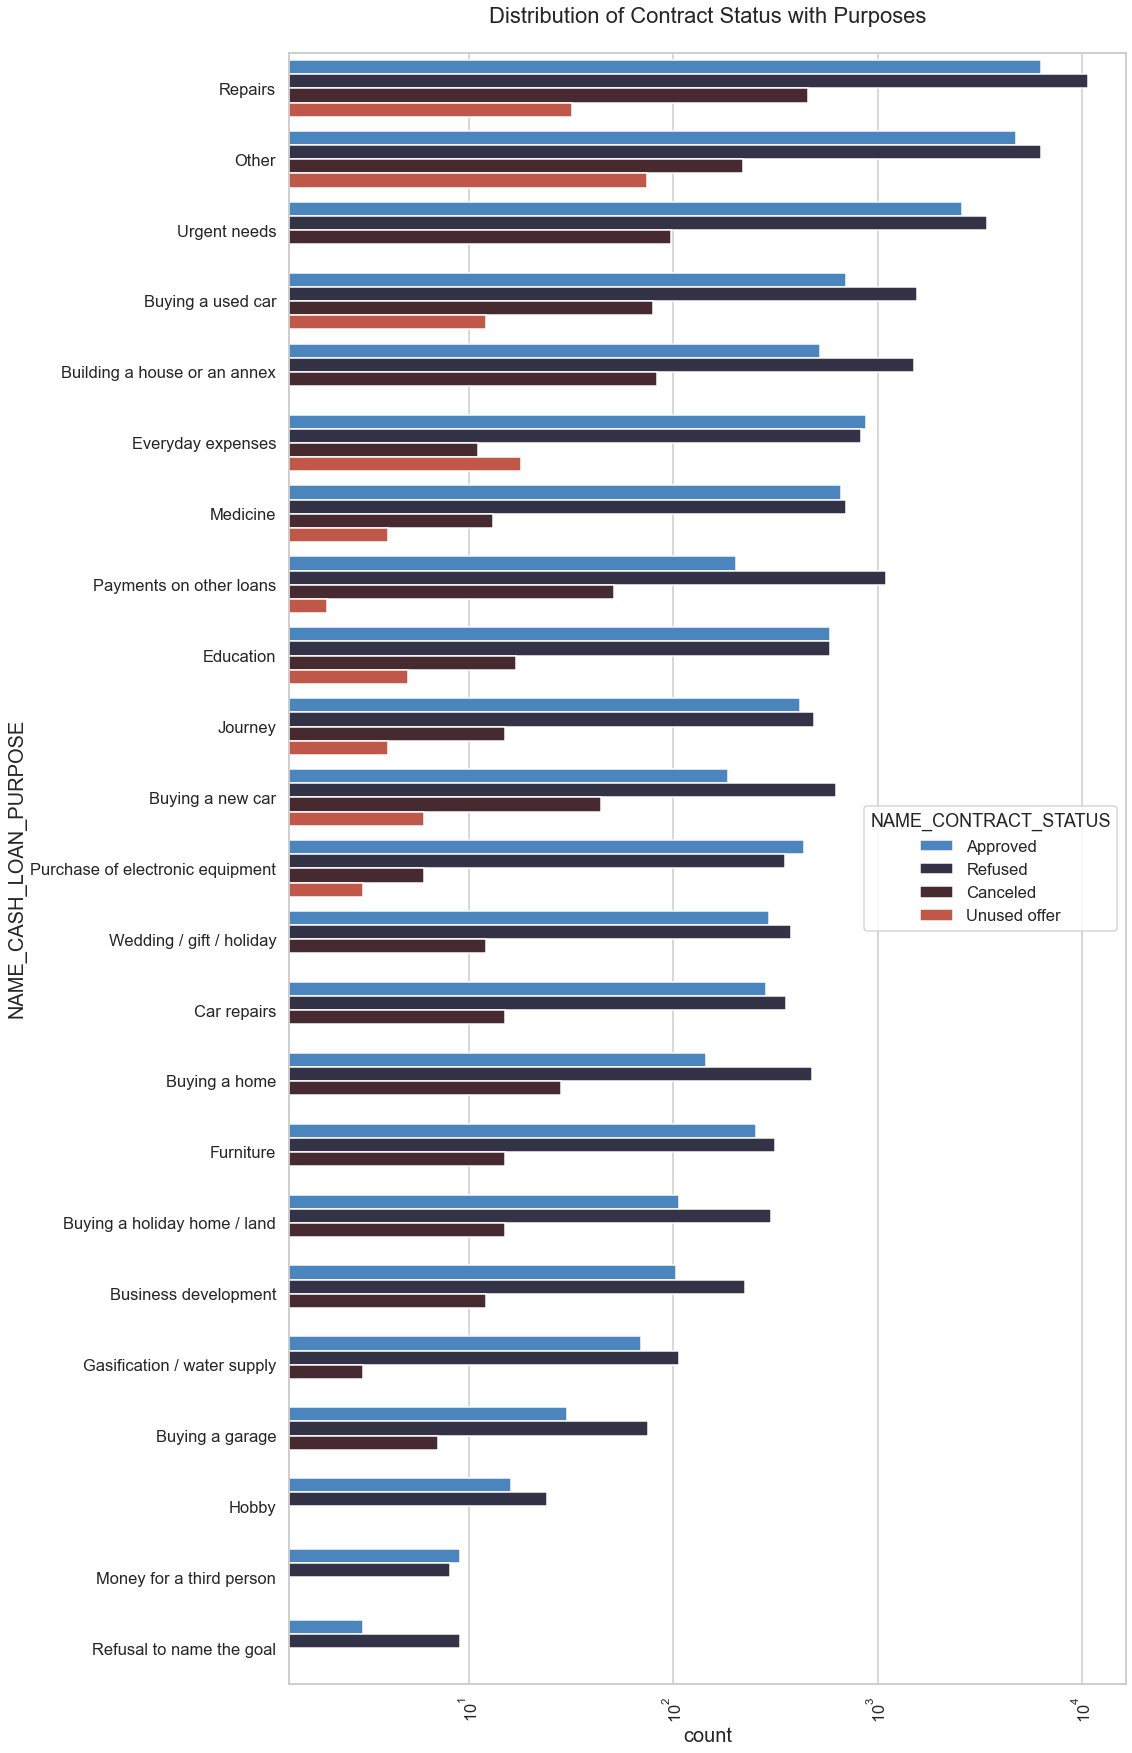

In [153]:
# Distribution of Cash Loans Vs Contract Purpose

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes')

ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='icefire')


Observations:- :
Repairs got most refused loans
Education has similar outcomes for approval and rejection of loans
Paying other loans and buying a new car is having significant higher rejection than approves.

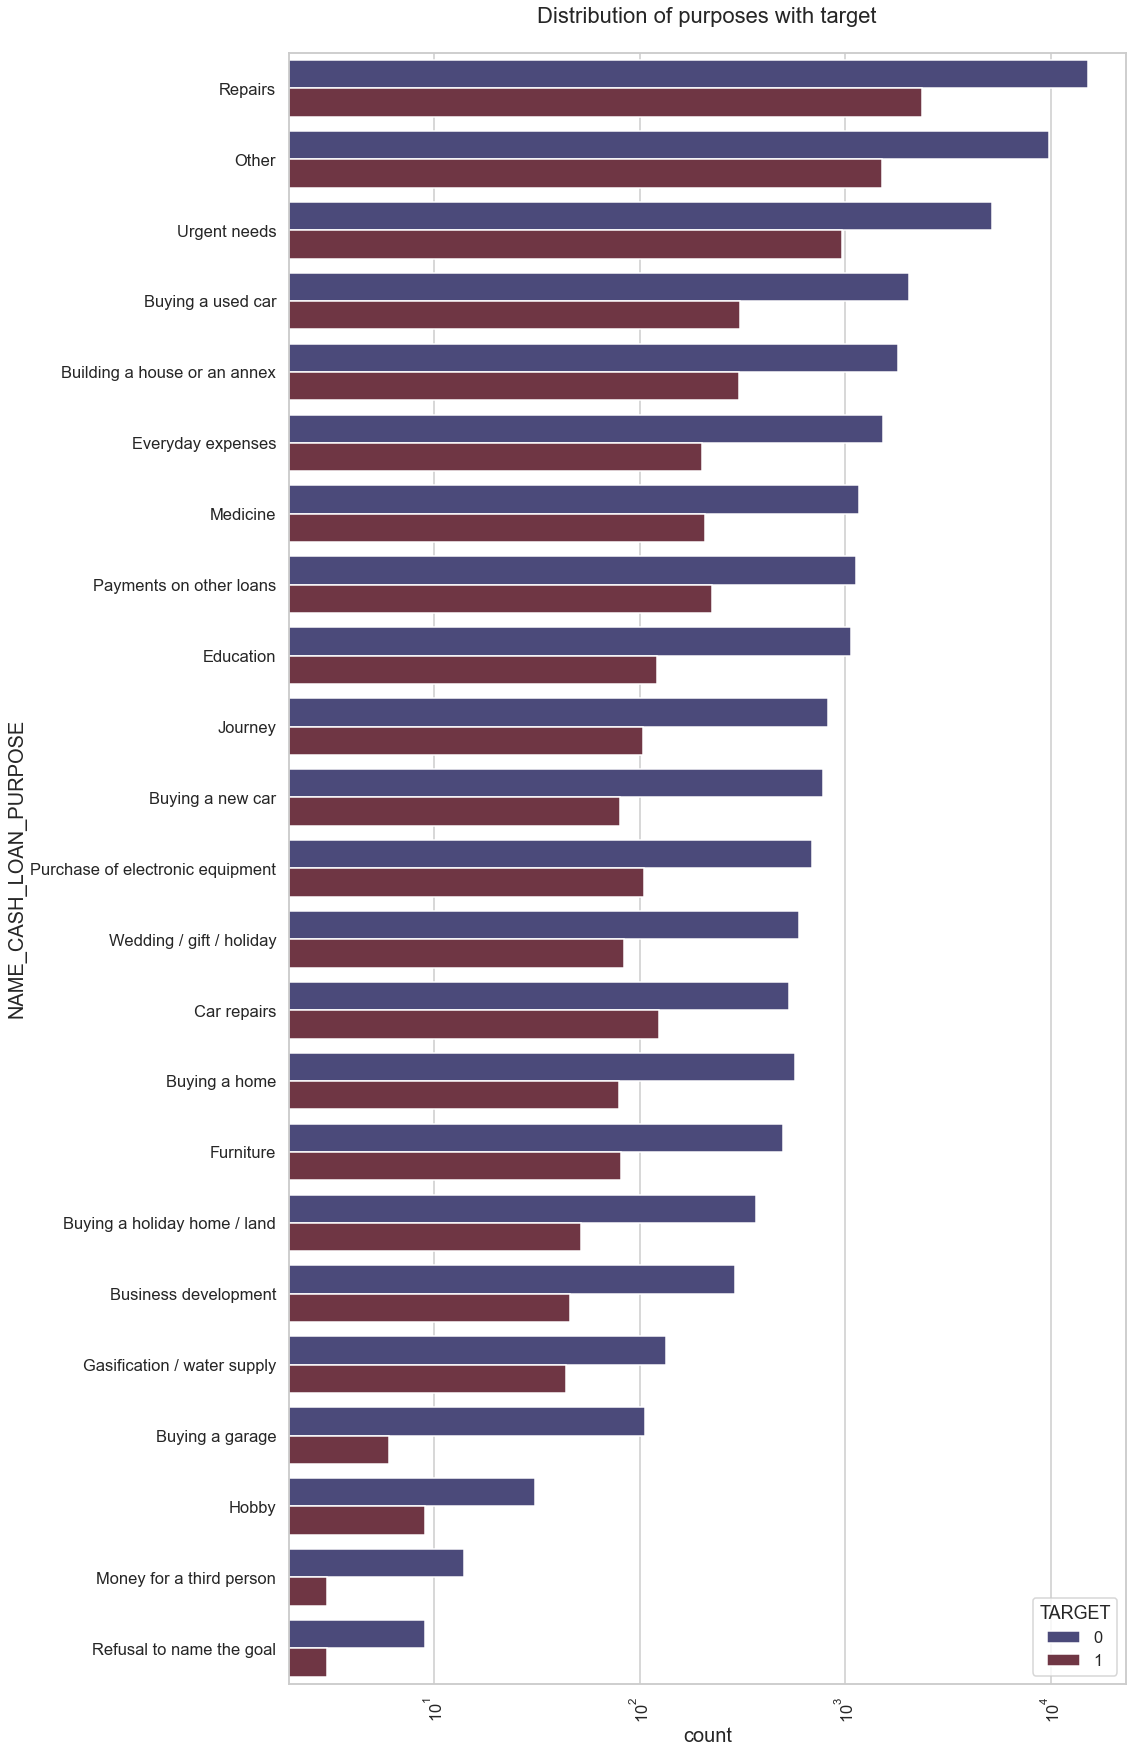

In [154]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='icefire')

Observations:- :
Repairs are dealing with more difficulties in payment on time
Buying a garage, Business development, Buying land, Buying a new car and Education having basically higher loan payment

**Performing bivariate analysis**

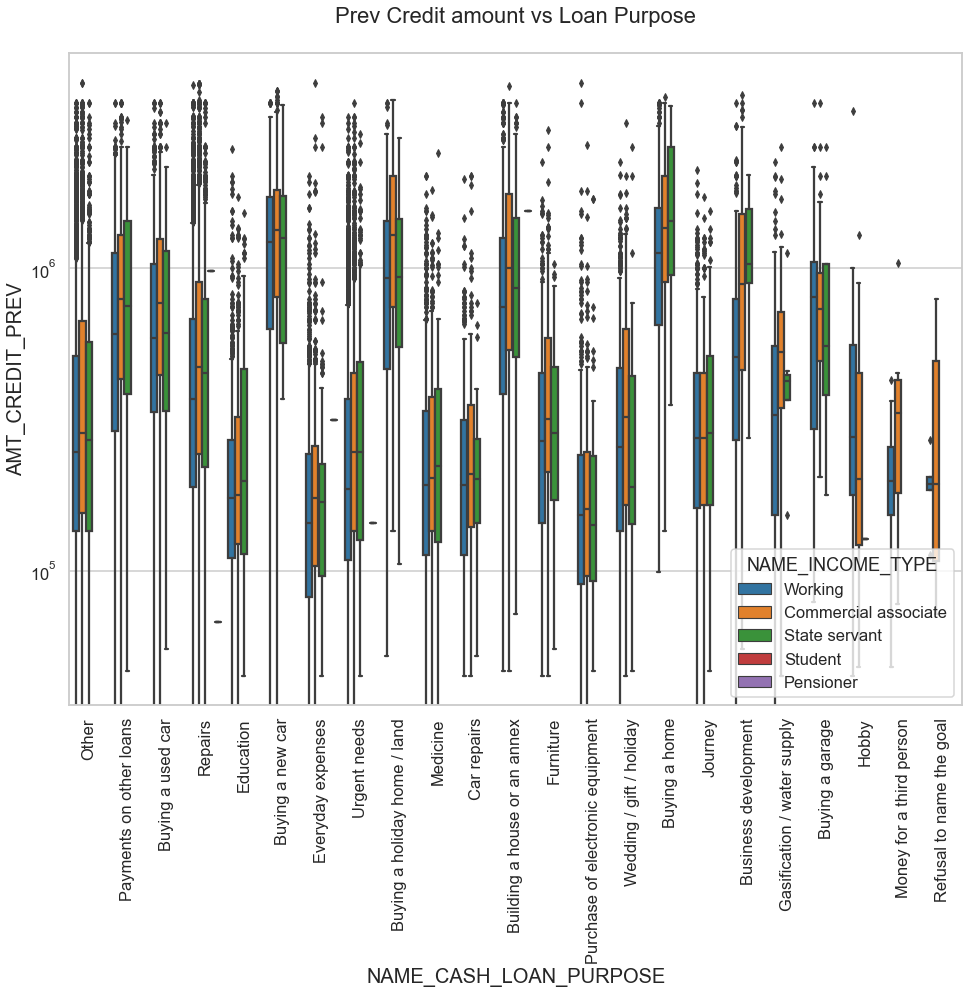

In [155]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

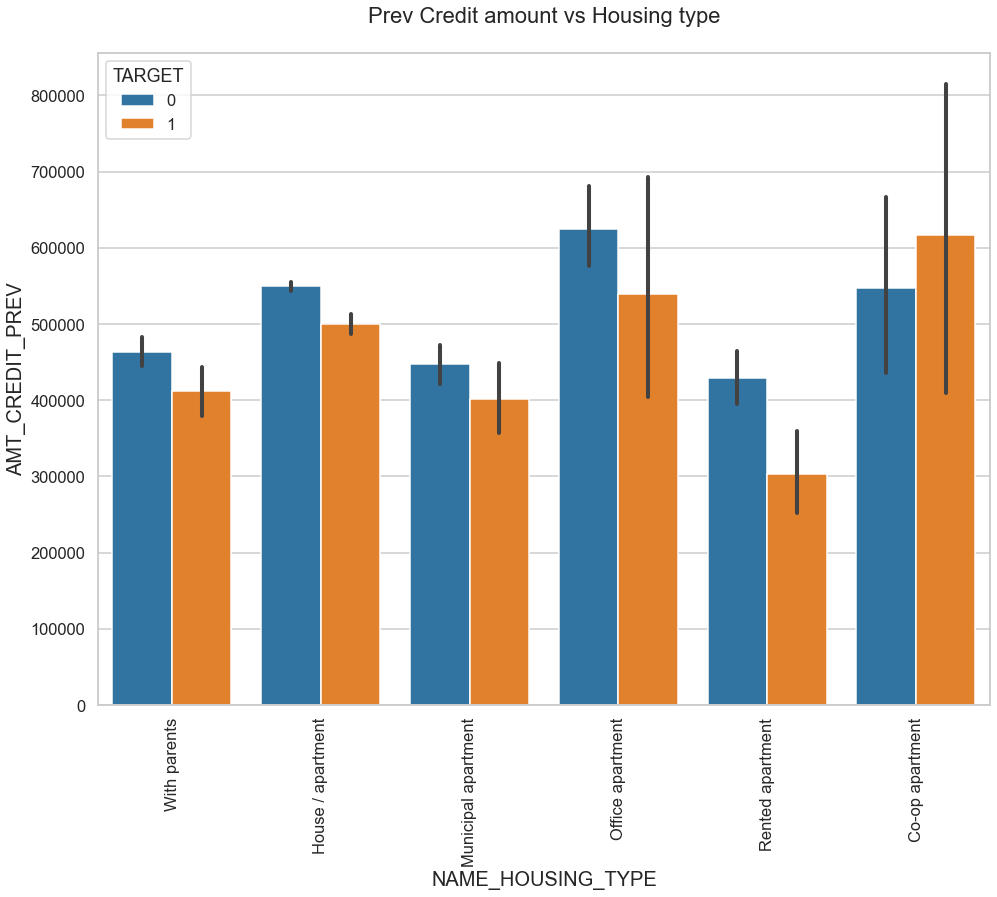

In [156]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

Conclusion:-

1. Bank should ive more loans from Housing Type 'With parents' as they less number of defaulters. Co-OP Apartment has the highest defaulters.
2. Bank should avoid people on income type as 'working' as they less successful payments.
3. Also, Loan Purpose'Repairs' have the highest unsuccessful payments.